In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import style
import pandas as pd
import seaborn as sns

import torch 
from torch.optim import SGD

In [2]:
data = pd.read_csv('wheat.csv')
data['category'] = data['category'].astype(int)
data = data.values


In [3]:
def relu(x):
    return torch.maximum(torch.tensor([0.0]), x)

def init_params(layers):
    params = []
    for i in range(len(layers)-1):
        params.append(torch.randn((layers[i], layers[i+1]), requires_grad=True))
        params.append(torch.randn((layers[i+1]), requires_grad=True))
    return params

def forward(x, params):
    op = x
    for i in range(0, len(params)-2, 2):
        op = relu(torch.matmul(op, params[i]) + params[i+1])
    op = torch.matmul(op, params[-2]) + params[-1]
    return op # shape will be (16, 3)

def accuracy(x, y, params):
    op = forward(x, params) # shape is (210, 3)
    _, ind = torch.max(op, axis=1)
    return torch.sum(ind==y)/y.shape[0]


In [4]:
def train(dataset, num_epochs, lr, batch_size, params, optimizer, loss_fn=torch.nn.CrossEntropyLoss() ,print_every=3):
    acc = []
    losses =  []
    #data_x = dataset[:, :-1].clone().detach()
    #data_y = dataset[:, -1].clone().detach().to(torch.int)
    data_x = torch.tensor(dataset[:, :-1], dtype=torch.float32)
    data_y = torch.tensor(dataset[:, -1], dtype=int)
    #losses.append(cross_entropy(data_y, forward(data_x, params)).item()) # this step won't be affective 
    for epoch in range(num_epochs):
        acc.append(accuracy(data_x, data_y-1, params))
        print(f'Accuracy {acc[-1]}')
        total_loss = 0
        #when the dataset is larger, we can instead do the sum of all the bacthes and take their averages    
       # if epoch%(num_epochs/10)==0:
           #print(f'epoch {epoch + 1}, loss {float(losses[-1]):f}, accuracy:{accuracy(data_x, data_y-1, params)}')
        #total_loss  =0
        #batches_processed = 0
        for i, batch in  enumerate(torch.utils.data.DataLoader(dataset , batch_size=batch_size), 1):
            inp = torch.tensor(batch[:, :-1], dtype=torch.float32)
            label = torch.tensor(batch[:, -1], dtype=int)
            op = forward(inp, params)
          
             
            current_loss = loss_fn(op, label-1) # -1 for making categories 0 indexed
            total_loss+= current_loss.item()
                     
                
            optimizer.zero_grad()
            current_loss.backward()
            optimizer.step()
            
            if i%print_every==0:
                print(f'Epoch[{epoch+1}], Current Loss: {current_loss.item()}')
            
            #batches_processed+= 1
        print("\n\n")
        losses.append(total_loss/(dataset.shape[0]/batch_size))
    return losses, acc

In [5]:
# hparameters and models
layer1 = [7, 3]
layer2 = [7, 8, 3]
layer3 = [7,8,4,3]
num_epochs = 2000
batch_size = 16
params1 = init_params(layer1)
params2 = init_params(layer2)
params3 = init_params(layer3)
lr = 0.001
optimizer1 = SGD(params=params1, lr=lr) 
optimizer2 = SGD(params=params2, lr=lr)
optimizer3 = SGD(params=params3, lr=lr)

Accuracy 0.3333333432674408
Epoch[1], Current Loss: 4.132623195648193
Epoch[1], Current Loss: 80.02922058105469
Epoch[1], Current Loss: 53.27872848510742
Epoch[1], Current Loss: 0.00041708414210006595



Accuracy 0.3619047701358795
Epoch[2], Current Loss: 1.8308342695236206
Epoch[2], Current Loss: 76.15342712402344
Epoch[2], Current Loss: 49.89080810546875
Epoch[2], Current Loss: 0.001334385946393013



Accuracy 0.4047619104385376
Epoch[3], Current Loss: 1.195002794265747
Epoch[3], Current Loss: 71.80039978027344
Epoch[3], Current Loss: 46.64735412597656
Epoch[3], Current Loss: 0.0021358293015509844



Accuracy 0.4285714328289032
Epoch[4], Current Loss: 0.991072952747345
Epoch[4], Current Loss: 67.22793579101562
Epoch[4], Current Loss: 43.41718673706055
Epoch[4], Current Loss: 0.0025963103398680687



Accuracy 0.4333333373069763
Epoch[5], Current Loss: 0.9161725640296936
Epoch[5], Current Loss: 62.564823150634766
Epoch[5], Current Loss: 40.18232727050781
Epoch[5], Current Loss: 0.00282

Epoch[79], Current Loss: 0.8632903695106506
Epoch[79], Current Loss: 1.318579912185669
Epoch[79], Current Loss: 0.2552054822444916
Epoch[79], Current Loss: 0.1671200543642044



Accuracy 0.6380952596664429
Epoch[80], Current Loss: 0.8609260320663452
Epoch[80], Current Loss: 1.309504747390747
Epoch[80], Current Loss: 0.2548573315143585
Epoch[80], Current Loss: 0.16671140491962433



Accuracy 0.6380952596664429
Epoch[81], Current Loss: 0.8585841655731201
Epoch[81], Current Loss: 1.300484538078308
Epoch[81], Current Loss: 0.25451645255088806
Epoch[81], Current Loss: 0.16630513966083527



Accuracy 0.6380952596664429
Epoch[82], Current Loss: 0.8562648892402649
Epoch[82], Current Loss: 1.2915209531784058
Epoch[82], Current Loss: 0.2541828453540802
Epoch[82], Current Loss: 0.16590093076229095



Accuracy 0.6380952596664429
Epoch[83], Current Loss: 0.8539656400680542
Epoch[83], Current Loss: 1.2826135158538818
Epoch[83], Current Loss: 0.25385671854019165
Epoch[83], Current Loss: 0.16549977660

Epoch[154], Current Loss: 0.7371479868888855
Epoch[154], Current Loss: 0.7937485575675964
Epoch[154], Current Loss: 0.24577289819717407
Epoch[154], Current Loss: 0.14348724484443665



Accuracy 0.6619047522544861
Epoch[155], Current Loss: 0.7360357046127319
Epoch[155], Current Loss: 0.7887508869171143
Epoch[155], Current Loss: 0.2458144575357437
Epoch[155], Current Loss: 0.1432679146528244



Accuracy 0.6619047522544861
Epoch[156], Current Loss: 0.7349334359169006
Epoch[156], Current Loss: 0.7838003635406494
Epoch[156], Current Loss: 0.2458583116531372
Epoch[156], Current Loss: 0.1430506706237793



Accuracy 0.6619047522544861
Epoch[157], Current Loss: 0.7338461875915527
Epoch[157], Current Loss: 0.7788937091827393
Epoch[157], Current Loss: 0.24590550363063812
Epoch[157], Current Loss: 0.14283576607704163



Accuracy 0.6619047522544861
Epoch[158], Current Loss: 0.7327669858932495
Epoch[158], Current Loss: 0.774034857749939
Epoch[158], Current Loss: 0.24595528841018677
Epoch[158], Curre

Epoch[193], Current Loss: 0.2489989995956421
Epoch[193], Current Loss: 0.13653764128684998



Accuracy 0.6857143044471741
Epoch[194], Current Loss: 0.7005037665367126
Epoch[194], Current Loss: 0.626420259475708
Epoch[194], Current Loss: 0.24911357462406158
Epoch[194], Current Loss: 0.13639886677265167



Accuracy 0.6857143044471741
Epoch[195], Current Loss: 0.6997644901275635
Epoch[195], Current Loss: 0.6229989528656006
Epoch[195], Current Loss: 0.24922899901866913
Epoch[195], Current Loss: 0.1362621933221817



Accuracy 0.6857143044471741
Epoch[196], Current Loss: 0.6990312933921814
Epoch[196], Current Loss: 0.6196103692054749
Epoch[196], Current Loss: 0.2493457794189453
Epoch[196], Current Loss: 0.13612717390060425



Accuracy 0.6857143044471741
Epoch[197], Current Loss: 0.6983073353767395
Epoch[197], Current Loss: 0.6162513494491577
Epoch[197], Current Loss: 0.2494632601737976
Epoch[197], Current Loss: 0.13599394261837006



Accuracy 0.6857143044471741
Epoch[198], Current Loss: 0.69

Epoch[234], Current Loss: 0.13214057683944702



Accuracy 0.7047619223594666
Epoch[235], Current Loss: 0.6752893924713135
Epoch[235], Current Loss: 0.5094224214553833
Epoch[235], Current Loss: 0.2544042766094208
Epoch[235], Current Loss: 0.13206182420253754



Accuracy 0.7047619223594666
Epoch[236], Current Loss: 0.6747853755950928
Epoch[236], Current Loss: 0.5070840716362
Epoch[236], Current Loss: 0.25454092025756836
Epoch[236], Current Loss: 0.13198411464691162



Accuracy 0.7095237970352173
Epoch[237], Current Loss: 0.6742854714393616
Epoch[237], Current Loss: 0.5047661066055298
Epoch[237], Current Loss: 0.2546783685684204
Epoch[237], Current Loss: 0.1319073736667633



Accuracy 0.7095237970352173
Epoch[238], Current Loss: 0.6737886071205139
Epoch[238], Current Loss: 0.5024701952934265
Epoch[238], Current Loss: 0.2548152804374695
Epoch[238], Current Loss: 0.13183170557022095



Accuracy 0.7142857313156128
Epoch[239], Current Loss: 0.6732984185218811
Epoch[239], Current Loss: 0.50019

Epoch[273], Current Loss: 0.1297977715730667



Accuracy 0.7571428418159485
Epoch[274], Current Loss: 0.6583963632583618
Epoch[274], Current Loss: 0.43176403641700745
Epoch[274], Current Loss: 0.2597385346889496
Epoch[274], Current Loss: 0.12975455820560455



Accuracy 0.7571428418159485
Epoch[275], Current Loss: 0.658026397228241
Epoch[275], Current Loss: 0.43008849024772644
Epoch[275], Current Loss: 0.2598726451396942
Epoch[275], Current Loss: 0.12971186637878418



Accuracy 0.761904776096344
Epoch[276], Current Loss: 0.6576610803604126
Epoch[276], Current Loss: 0.4284270703792572
Epoch[276], Current Loss: 0.26000717282295227
Epoch[276], Current Loss: 0.12966997921466827



Accuracy 0.761904776096344
Epoch[277], Current Loss: 0.657296895980835
Epoch[277], Current Loss: 0.42677873373031616
Epoch[277], Current Loss: 0.2601408064365387
Epoch[277], Current Loss: 0.12962865829467773



Accuracy 0.761904776096344
Epoch[278], Current Loss: 0.6569347977638245
Epoch[278], Current Loss: 0.4251

Epoch[312], Current Loss: 0.128541961312294



Accuracy 0.7904762029647827
Epoch[313], Current Loss: 0.6457352638244629
Epoch[313], Current Loss: 0.3752534091472626
Epoch[313], Current Loss: 0.2648078501224518
Epoch[313], Current Loss: 0.12851954996585846



Accuracy 0.7904762029647827
Epoch[314], Current Loss: 0.6454500555992126
Epoch[314], Current Loss: 0.3740121126174927
Epoch[314], Current Loss: 0.26493242383003235
Epoch[314], Current Loss: 0.1284971982240677



Accuracy 0.7952380776405334
Epoch[315], Current Loss: 0.6451682448387146
Epoch[315], Current Loss: 0.37277889251708984
Epoch[315], Current Loss: 0.2650572657585144
Epoch[315], Current Loss: 0.12847553193569183



Accuracy 0.7952380776405334
Epoch[316], Current Loss: 0.6448851823806763
Epoch[316], Current Loss: 0.37155649065971375
Epoch[316], Current Loss: 0.2651812434196472
Epoch[316], Current Loss: 0.12845425307750702



Accuracy 0.7952380776405334
Epoch[317], Current Loss: 0.6446068286895752
Epoch[317], Current Loss: 0.37

Epoch[353], Current Loss: 0.6355187892913818
Epoch[353], Current Loss: 0.33174994587898254
Epoch[353], Current Loss: 0.2695685625076294
Epoch[353], Current Loss: 0.1278865784406662



Accuracy 0.8238095045089722
Epoch[354], Current Loss: 0.6352888941764832
Epoch[354], Current Loss: 0.33080530166625977
Epoch[354], Current Loss: 0.2696821987628937
Epoch[354], Current Loss: 0.1278761327266693



Accuracy 0.8238095045089722
Epoch[355], Current Loss: 0.6350622177124023
Epoch[355], Current Loss: 0.3298649787902832
Epoch[355], Current Loss: 0.2697945535182953
Epoch[355], Current Loss: 0.12786607444286346



Accuracy 0.8238095045089722
Epoch[356], Current Loss: 0.6348345279693604
Epoch[356], Current Loss: 0.32893139123916626
Epoch[356], Current Loss: 0.2699064314365387
Epoch[356], Current Loss: 0.12785601615905762



Accuracy 0.8238095045089722
Epoch[357], Current Loss: 0.6346089839935303
Epoch[357], Current Loss: 0.32800430059432983
Epoch[357], Current Loss: 0.2700193524360657
Epoch[357], Cur

Epoch[391], Current Loss: 0.1276026964187622



Accuracy 0.8476190567016602
Epoch[392], Current Loss: 0.627314031124115
Epoch[392], Current Loss: 0.29888084530830383
Epoch[392], Current Loss: 0.27377209067344666
Epoch[392], Current Loss: 0.12759755551815033



Accuracy 0.8476190567016602
Epoch[393], Current Loss: 0.62712162733078
Epoch[393], Current Loss: 0.29813435673713684
Epoch[393], Current Loss: 0.2738743722438812
Epoch[393], Current Loss: 0.12759283185005188



Accuracy 0.8476190567016602
Epoch[394], Current Loss: 0.6269285678863525
Epoch[394], Current Loss: 0.29739290475845337
Epoch[394], Current Loss: 0.2739773988723755
Epoch[394], Current Loss: 0.12758783996105194



Accuracy 0.8476190567016602
Epoch[395], Current Loss: 0.626737654209137
Epoch[395], Current Loss: 0.29665476083755493
Epoch[395], Current Loss: 0.2740788459777832
Epoch[395], Current Loss: 0.12758320569992065



Accuracy 0.8476190567016602
Epoch[396], Current Loss: 0.6265475749969482
Epoch[396], Current Loss: 0.29

Epoch[434], Current Loss: 0.2778591811656952
Epoch[434], Current Loss: 0.12745332717895508



Accuracy 0.8619047403335571
Epoch[435], Current Loss: 0.6196095943450928
Epoch[435], Current Loss: 0.2702200412750244
Epoch[435], Current Loss: 0.2779521048069
Epoch[435], Current Loss: 0.12745095789432526



Accuracy 0.8619047403335571
Epoch[436], Current Loss: 0.6194441914558411
Epoch[436], Current Loss: 0.2696271538734436
Epoch[436], Current Loss: 0.27804362773895264
Epoch[436], Current Loss: 0.1274486780166626



Accuracy 0.8619047403335571
Epoch[437], Current Loss: 0.6192781925201416
Epoch[437], Current Loss: 0.2690386474132538
Epoch[437], Current Loss: 0.2781350612640381
Epoch[437], Current Loss: 0.12744615972042084



Accuracy 0.8619047403335571
Epoch[438], Current Loss: 0.6191139817237854
Epoch[438], Current Loss: 0.2684524655342102
Epoch[438], Current Loss: 0.2782271206378937
Epoch[438], Current Loss: 0.12744411826133728



Accuracy 0.8619047403335571
Epoch[439], Current Loss: 0.61894

Epoch[510], Current Loss: 0.6083202362060547
Epoch[510], Current Loss: 0.2328318953514099
Epoch[510], Current Loss: 0.2842729985713959
Epoch[510], Current Loss: 0.1272897571325302



Accuracy 0.8904761672019958
Epoch[511], Current Loss: 0.6081820130348206
Epoch[511], Current Loss: 0.23241496086120605
Epoch[511], Current Loss: 0.2843509018421173
Epoch[511], Current Loss: 0.12728717923164368



Accuracy 0.8904761672019958
Epoch[512], Current Loss: 0.6080463528633118
Epoch[512], Current Loss: 0.23199774324893951
Epoch[512], Current Loss: 0.28442704677581787
Epoch[512], Current Loss: 0.12728455662727356



Accuracy 0.8904761672019958
Epoch[513], Current Loss: 0.6079090237617493
Epoch[513], Current Loss: 0.23158273100852966
Epoch[513], Current Loss: 0.28450343012809753
Epoch[513], Current Loss: 0.12728174030780792



Accuracy 0.8904761672019958
Epoch[514], Current Loss: 0.6077728867530823
Epoch[514], Current Loss: 0.23117047548294067
Epoch[514], Current Loss: 0.2845804989337921
Epoch[514], 

Epoch[582], Current Loss: 0.1270265132188797



Accuracy 0.8904761672019958
Epoch[583], Current Loss: 0.5989556312561035
Epoch[583], Current Loss: 0.20633888244628906
Epoch[583], Current Loss: 0.28947246074676514
Epoch[583], Current Loss: 0.1270214319229126



Accuracy 0.8904761672019958
Epoch[584], Current Loss: 0.5988348722457886
Epoch[584], Current Loss: 0.2060251384973526
Epoch[584], Current Loss: 0.2895382046699524
Epoch[584], Current Loss: 0.12701651453971863



Accuracy 0.8904761672019958
Epoch[585], Current Loss: 0.5987153053283691
Epoch[585], Current Loss: 0.2057119905948639
Epoch[585], Current Loss: 0.2896033525466919
Epoch[585], Current Loss: 0.12701165676116943



Accuracy 0.8904761672019958
Epoch[586], Current Loss: 0.598594605922699
Epoch[586], Current Loss: 0.20540086925029755
Epoch[586], Current Loss: 0.289669394493103
Epoch[586], Current Loss: 0.12700650095939636



Accuracy 0.8904761672019958
Epoch[587], Current Loss: 0.5984750390052795
Epoch[587], Current Loss: 0.205

Epoch[637], Current Loss: 0.12669792771339417



Accuracy 0.8999999761581421
Epoch[638], Current Loss: 0.5925823450088501
Epoch[638], Current Loss: 0.1906062811613083
Epoch[638], Current Loss: 0.2928889989852905
Epoch[638], Current Loss: 0.12669114768505096



Accuracy 0.8999999761581421
Epoch[639], Current Loss: 0.5924710035324097
Epoch[639], Current Loss: 0.19034671783447266
Epoch[639], Current Loss: 0.2929479479789734
Epoch[639], Current Loss: 0.12668396532535553



Accuracy 0.8999999761581421
Epoch[640], Current Loss: 0.592359185218811
Epoch[640], Current Loss: 0.19008740782737732
Epoch[640], Current Loss: 0.2930058538913727
Epoch[640], Current Loss: 0.12667661905288696



Accuracy 0.8999999761581421
Epoch[641], Current Loss: 0.5922475457191467
Epoch[641], Current Loss: 0.1898297369480133
Epoch[641], Current Loss: 0.2930644750595093
Epoch[641], Current Loss: 0.1266692727804184



Accuracy 0.8999999761581421
Epoch[642], Current Loss: 0.5921369791030884
Epoch[642], Current Loss: 0.18

Epoch[696], Current Loss: 0.1768220067024231
Epoch[696], Current Loss: 0.296101838350296
Epoch[696], Current Loss: 0.12621654570102692



Accuracy 0.8999999761581421
Epoch[697], Current Loss: 0.5862117409706116
Epoch[697], Current Loss: 0.17660529911518097
Epoch[697], Current Loss: 0.2961544692516327
Epoch[697], Current Loss: 0.12620727717876434



Accuracy 0.8999999761581421
Epoch[698], Current Loss: 0.5861066579818726
Epoch[698], Current Loss: 0.1763896644115448
Epoch[698], Current Loss: 0.2962063252925873
Epoch[698], Current Loss: 0.12619774043560028



Accuracy 0.8999999761581421
Epoch[699], Current Loss: 0.5860021114349365
Epoch[699], Current Loss: 0.1761743277311325
Epoch[699], Current Loss: 0.296258807182312
Epoch[699], Current Loss: 0.12618829309940338



Accuracy 0.8999999761581421
Epoch[700], Current Loss: 0.5858975052833557
Epoch[700], Current Loss: 0.17595955729484558
Epoch[700], Current Loss: 0.29631030559539795
Epoch[700], Current Loss: 0.12617909908294678



Accuracy 0.8




Accuracy 0.9047619104385376
Epoch[748], Current Loss: 0.5810065269470215
Epoch[748], Current Loss: 0.16633933782577515
Epoch[748], Current Loss: 0.29868972301483154
Epoch[748], Current Loss: 0.12568792700767517



Accuracy 0.9047619104385376
Epoch[749], Current Loss: 0.580906867980957
Epoch[749], Current Loss: 0.16615255177021027
Epoch[749], Current Loss: 0.2987380623817444
Epoch[749], Current Loss: 0.12567682564258575



Accuracy 0.9047619104385376
Epoch[750], Current Loss: 0.580808162689209
Epoch[750], Current Loss: 0.16596613824367523
Epoch[750], Current Loss: 0.29878488183021545
Epoch[750], Current Loss: 0.12566553056240082



Accuracy 0.9047619104385376
Epoch[751], Current Loss: 0.5807090997695923
Epoch[751], Current Loss: 0.1657802313566208
Epoch[751], Current Loss: 0.2988315224647522
Epoch[751], Current Loss: 0.125654399394989



Accuracy 0.9047619104385376
Epoch[752], Current Loss: 0.5806099772453308
Epoch[752], Current Loss: 0.16559405624866486
Epoch[752], Current Loss: 0.2

Epoch[811], Current Loss: 0.15547806024551392
Epoch[811], Current Loss: 0.3015056848526001
Epoch[811], Current Loss: 0.12493117153644562



Accuracy 0.9047619104385376
Epoch[812], Current Loss: 0.5747966766357422
Epoch[812], Current Loss: 0.15532003343105316
Epoch[812], Current Loss: 0.3015483319759369
Epoch[812], Current Loss: 0.12491808831691742



Accuracy 0.9047619104385376
Epoch[813], Current Loss: 0.5747019052505493
Epoch[813], Current Loss: 0.155162051320076
Epoch[813], Current Loss: 0.30159056186676025
Epoch[813], Current Loss: 0.12490525841712952



Accuracy 0.9047619104385376
Epoch[814], Current Loss: 0.5746083855628967
Epoch[814], Current Loss: 0.15500320494174957
Epoch[814], Current Loss: 0.3016311824321747
Epoch[814], Current Loss: 0.12489214539527893



Accuracy 0.9047619104385376
Epoch[815], Current Loss: 0.5745149850845337
Epoch[815], Current Loss: 0.15484628081321716
Epoch[815], Current Loss: 0.30167385935783386
Epoch[815], Current Loss: 0.12487909942865372



Accuracy

Epoch[867], Current Loss: 0.5696989297866821
Epoch[867], Current Loss: 0.14716605842113495
Epoch[867], Current Loss: 0.3037513196468353
Epoch[867], Current Loss: 0.12416604161262512



Accuracy 0.9047619104385376
Epoch[868], Current Loss: 0.5696080327033997
Epoch[868], Current Loss: 0.14702752232551575
Epoch[868], Current Loss: 0.303789347410202
Epoch[868], Current Loss: 0.12415190786123276



Accuracy 0.9047619104385376
Epoch[869], Current Loss: 0.5695163607597351
Epoch[869], Current Loss: 0.14689011871814728
Epoch[869], Current Loss: 0.30382832884788513
Epoch[869], Current Loss: 0.12413787096738815



Accuracy 0.9047619104385376
Epoch[870], Current Loss: 0.5694255232810974
Epoch[870], Current Loss: 0.14675138890743256
Epoch[870], Current Loss: 0.30386561155319214
Epoch[870], Current Loss: 0.12412334233522415



Accuracy 0.9047619104385376
Epoch[871], Current Loss: 0.5693358182907104
Epoch[871], Current Loss: 0.14661350846290588
Epoch[871], Current Loss: 0.3039032816886902
Epoch[871],

Epoch[922], Current Loss: 0.12334486097097397



Accuracy 0.9047619104385376
Epoch[923], Current Loss: 0.5647001266479492
Epoch[923], Current Loss: 0.13986703753471375
Epoch[923], Current Loss: 0.3057847321033478
Epoch[923], Current Loss: 0.12332925200462341



Accuracy 0.9047619104385376
Epoch[924], Current Loss: 0.5646119117736816
Epoch[924], Current Loss: 0.13974528014659882
Epoch[924], Current Loss: 0.3058197498321533
Epoch[924], Current Loss: 0.12331390380859375



Accuracy 0.9047619104385376
Epoch[925], Current Loss: 0.5645251274108887
Epoch[925], Current Loss: 0.1396230012178421
Epoch[925], Current Loss: 0.30585402250289917
Epoch[925], Current Loss: 0.12329840660095215



Accuracy 0.9047619104385376
Epoch[926], Current Loss: 0.5644376277923584
Epoch[926], Current Loss: 0.1395009458065033
Epoch[926], Current Loss: 0.30588850378990173
Epoch[926], Current Loss: 0.12328299880027771



Accuracy 0.9047619104385376
Epoch[927], Current Loss: 0.5643495321273804
Epoch[927], Current Loss: 

Epoch[971], Current Loss: 0.30737757682800293
Epoch[971], Current Loss: 0.122563436627388



Accuracy 0.9047619104385376
Epoch[972], Current Loss: 0.5604706406593323
Epoch[972], Current Loss: 0.13416866958141327
Epoch[972], Current Loss: 0.3074094355106354
Epoch[972], Current Loss: 0.12254749983549118



Accuracy 0.9047619104385376
Epoch[973], Current Loss: 0.5603842735290527
Epoch[973], Current Loss: 0.1340581774711609
Epoch[973], Current Loss: 0.30744099617004395
Epoch[973], Current Loss: 0.12253082543611526



Accuracy 0.9047619104385376
Epoch[974], Current Loss: 0.5602997541427612
Epoch[974], Current Loss: 0.13394823670387268
Epoch[974], Current Loss: 0.3074726462364197
Epoch[974], Current Loss: 0.12251462042331696



Accuracy 0.9047619104385376
Epoch[975], Current Loss: 0.5602158904075623
Epoch[975], Current Loss: 0.13383808732032776
Epoch[975], Current Loss: 0.3075040876865387
Epoch[975], Current Loss: 0.12249822169542313



Accuracy 0.9047619104385376
Epoch[976], Current Loss: 0




Accuracy 0.9047619104385376
Epoch[1012], Current Loss: 0.5571068525314331
Epoch[1012], Current Loss: 0.1299222707748413
Epoch[1012], Current Loss: 0.30863848328590393
Epoch[1012], Current Loss: 0.12188007682561874



Accuracy 0.9047619104385376
Epoch[1013], Current Loss: 0.5570237040519714
Epoch[1013], Current Loss: 0.12982039153575897
Epoch[1013], Current Loss: 0.30866774916648865
Epoch[1013], Current Loss: 0.12186311930418015



Accuracy 0.9047619104385376
Epoch[1014], Current Loss: 0.5569403767585754
Epoch[1014], Current Loss: 0.1297188699245453
Epoch[1014], Current Loss: 0.30869850516319275
Epoch[1014], Current Loss: 0.12184641510248184



Accuracy 0.9047619104385376
Epoch[1015], Current Loss: 0.5568557977676392
Epoch[1015], Current Loss: 0.1296175718307495
Epoch[1015], Current Loss: 0.3087274432182312
Epoch[1015], Current Loss: 0.1218293160200119



Accuracy 0.9047619104385376
Epoch[1016], Current Loss: 0.5567735433578491
Epoch[1016], Current Loss: 0.12951594591140747
Epoch[101

Epoch[1060], Current Loss: 0.5531705021858215
Epoch[1060], Current Loss: 0.12524370849132538
Epoch[1060], Current Loss: 0.310007244348526
Epoch[1060], Current Loss: 0.12105092406272888



Accuracy 0.9047619104385376
Epoch[1061], Current Loss: 0.5530898571014404
Epoch[1061], Current Loss: 0.12515075504779816
Epoch[1061], Current Loss: 0.3100353181362152
Epoch[1061], Current Loss: 0.12103362381458282



Accuracy 0.9047619104385376
Epoch[1062], Current Loss: 0.553009033203125
Epoch[1062], Current Loss: 0.12505751848220825
Epoch[1062], Current Loss: 0.31006163358688354
Epoch[1062], Current Loss: 0.12101610749959946



Accuracy 0.9047619104385376
Epoch[1063], Current Loss: 0.5529285073280334
Epoch[1063], Current Loss: 0.12496531754732132
Epoch[1063], Current Loss: 0.3100898265838623
Epoch[1063], Current Loss: 0.12099847197532654



Accuracy 0.9047619104385376
Epoch[1064], Current Loss: 0.5528470873832703
Epoch[1064], Current Loss: 0.12487263977527618
Epoch[1064], Current Loss: 0.31011658906

Accuracy 0.9047619104385376
Epoch[1115], Current Loss: 0.5487863421440125
Epoch[1115], Current Loss: 0.12036754935979843
Epoch[1115], Current Loss: 0.31144773960113525
Epoch[1115], Current Loss: 0.12007055431604385



Accuracy 0.9047619104385376
Epoch[1116], Current Loss: 0.5487063527107239
Epoch[1116], Current Loss: 0.12028374522924423
Epoch[1116], Current Loss: 0.3114735186100006
Epoch[1116], Current Loss: 0.12005255371332169



Accuracy 0.9047619104385376
Epoch[1117], Current Loss: 0.5486283302307129
Epoch[1117], Current Loss: 0.12019951641559601
Epoch[1117], Current Loss: 0.3114984929561615
Epoch[1117], Current Loss: 0.12003441900014877



Accuracy 0.9047619104385376
Epoch[1118], Current Loss: 0.5485498905181885
Epoch[1118], Current Loss: 0.12011509388685226
Epoch[1118], Current Loss: 0.3115227520465851
Epoch[1118], Current Loss: 0.12001674622297287



Accuracy 0.9047619104385376
Epoch[1119], Current Loss: 0.5484716296195984
Epoch[1119], Current Loss: 0.1200312152504921
Epoch[1119]

Epoch[1157], Current Loss: 0.5455209016799927
Epoch[1157], Current Loss: 0.11694909632205963
Epoch[1157], Current Loss: 0.3124643564224243
Epoch[1157], Current Loss: 0.11930391192436218



Accuracy 0.8952381014823914
Epoch[1158], Current Loss: 0.5454443693161011
Epoch[1158], Current Loss: 0.11687050014734268
Epoch[1158], Current Loss: 0.31248706579208374
Epoch[1158], Current Loss: 0.11928567290306091



Accuracy 0.8952381014823914
Epoch[1159], Current Loss: 0.5453692078590393
Epoch[1159], Current Loss: 0.11679202318191528
Epoch[1159], Current Loss: 0.3125106692314148
Epoch[1159], Current Loss: 0.11926700174808502



Accuracy 0.8952381014823914
Epoch[1160], Current Loss: 0.5452920198440552
Epoch[1160], Current Loss: 0.11671391874551773
Epoch[1160], Current Loss: 0.31253382563591003
Epoch[1160], Current Loss: 0.11924859136343002



Accuracy 0.8952381014823914
Epoch[1161], Current Loss: 0.5452153086662292
Epoch[1161], Current Loss: 0.11663562059402466
Epoch[1161], Current Loss: 0.31255751

Epoch[1223], Current Loss: 0.11807618290185928



Accuracy 0.8952381014823914
Epoch[1224], Current Loss: 0.5404587388038635
Epoch[1224], Current Loss: 0.11196461319923401
Epoch[1224], Current Loss: 0.3139469623565674
Epoch[1224], Current Loss: 0.1180572509765625



Accuracy 0.8952381014823914
Epoch[1225], Current Loss: 0.5403850078582764
Epoch[1225], Current Loss: 0.11189466714859009
Epoch[1225], Current Loss: 0.3139682710170746
Epoch[1225], Current Loss: 0.11803862452507019



Accuracy 0.8952381014823914
Epoch[1226], Current Loss: 0.5403100252151489
Epoch[1226], Current Loss: 0.11182428151369095
Epoch[1226], Current Loss: 0.3139890134334564
Epoch[1226], Current Loss: 0.1180197224020958



Accuracy 0.8952381014823914
Epoch[1227], Current Loss: 0.5402364134788513
Epoch[1227], Current Loss: 0.11175388097763062
Epoch[1227], Current Loss: 0.31400948762893677
Epoch[1227], Current Loss: 0.11800087243318558



Accuracy 0.8952381014823914
Epoch[1228], Current Loss: 0.5401626825332642
Epoch[122

Epoch[1282], Current Loss: 0.3151076138019562
Epoch[1282], Current Loss: 0.11696227639913559



Accuracy 0.8999999761581421
Epoch[1283], Current Loss: 0.5361377000808716
Epoch[1283], Current Loss: 0.1079910397529602
Epoch[1283], Current Loss: 0.31512606143951416
Epoch[1283], Current Loss: 0.1169431060552597



Accuracy 0.8999999761581421
Epoch[1284], Current Loss: 0.5360667705535889
Epoch[1284], Current Loss: 0.10792648047208786
Epoch[1284], Current Loss: 0.3151448667049408
Epoch[1284], Current Loss: 0.11692385375499725



Accuracy 0.8999999761581421
Epoch[1285], Current Loss: 0.5359944701194763
Epoch[1285], Current Loss: 0.10786284506320953
Epoch[1285], Current Loss: 0.3151644766330719
Epoch[1285], Current Loss: 0.11690529435873032



Accuracy 0.8999999761581421
Epoch[1286], Current Loss: 0.5359215140342712
Epoch[1286], Current Loss: 0.1077984943985939
Epoch[1286], Current Loss: 0.315183162689209
Epoch[1286], Current Loss: 0.11688638478517532



Accuracy 0.8999999761581421
Epoch[1287]

Epoch[1322], Current Loss: 0.10555059462785721
Epoch[1322], Current Loss: 0.31584620475769043
Epoch[1322], Current Loss: 0.11620096117258072



Accuracy 0.8999999761581421
Epoch[1323], Current Loss: 0.5332801342010498
Epoch[1323], Current Loss: 0.10548974573612213
Epoch[1323], Current Loss: 0.3158637583255768
Epoch[1323], Current Loss: 0.11618158221244812



Accuracy 0.8999999761581421
Epoch[1324], Current Loss: 0.5332098007202148
Epoch[1324], Current Loss: 0.10542904585599899
Epoch[1324], Current Loss: 0.31588104367256165
Epoch[1324], Current Loss: 0.11616286635398865



Accuracy 0.8999999761581421
Epoch[1325], Current Loss: 0.5331400036811829
Epoch[1325], Current Loss: 0.10536830872297287
Epoch[1325], Current Loss: 0.31589895486831665
Epoch[1325], Current Loss: 0.11614363640546799



Accuracy 0.8999999761581421
Epoch[1326], Current Loss: 0.5330684185028076
Epoch[1326], Current Loss: 0.10530810803174973
Epoch[1326], Current Loss: 0.3159182667732239
Epoch[1326], Current Loss: 0.1161248

Epoch[1362], Current Loss: 0.1154375746846199



Accuracy 0.8999999761581421
Epoch[1363], Current Loss: 0.5304754972457886
Epoch[1363], Current Loss: 0.10312823206186295
Epoch[1363], Current Loss: 0.3165549337863922
Epoch[1363], Current Loss: 0.1154184639453888



Accuracy 0.8999999761581421
Epoch[1364], Current Loss: 0.5304071307182312
Epoch[1364], Current Loss: 0.10307066142559052
Epoch[1364], Current Loss: 0.31657174229621887
Epoch[1364], Current Loss: 0.11539953202009201



Accuracy 0.8999999761581421
Epoch[1365], Current Loss: 0.5303380489349365
Epoch[1365], Current Loss: 0.1030135452747345
Epoch[1365], Current Loss: 0.31658920645713806
Epoch[1365], Current Loss: 0.1153804212808609



Accuracy 0.8999999761581421
Epoch[1366], Current Loss: 0.5302676558494568
Epoch[1366], Current Loss: 0.10295610129833221
Epoch[1366], Current Loss: 0.31660500168800354
Epoch[1366], Current Loss: 0.11536136269569397



Accuracy 0.8999999761581421
Epoch[1367], Current Loss: 0.530198872089386
Epoch[1367

Epoch[1417], Current Loss: 0.3174206018447876
Epoch[1417], Current Loss: 0.11438577622175217



Accuracy 0.8999999761581421
Epoch[1418], Current Loss: 0.5267091393470764
Epoch[1418], Current Loss: 0.10008664429187775
Epoch[1418], Current Loss: 0.3174354135990143
Epoch[1418], Current Loss: 0.1143665686249733



Accuracy 0.8999999761581421
Epoch[1419], Current Loss: 0.5266409516334534
Epoch[1419], Current Loss: 0.10003369301557541
Epoch[1419], Current Loss: 0.31745192408561707
Epoch[1419], Current Loss: 0.11434748768806458



Accuracy 0.8999999761581421
Epoch[1420], Current Loss: 0.5265728235244751
Epoch[1420], Current Loss: 0.09998073428869247
Epoch[1420], Current Loss: 0.3174671530723572
Epoch[1420], Current Loss: 0.11432845145463943



Accuracy 0.8999999761581421
Epoch[1421], Current Loss: 0.526505708694458
Epoch[1421], Current Loss: 0.09992748498916626
Epoch[1421], Current Loss: 0.31748175621032715
Epoch[1421], Current Loss: 0.11430957168340683



Accuracy 0.8999999761581421
Epoch[14

Epoch[1474], Current Loss: 0.522972822189331
Epoch[1474], Current Loss: 0.09720973670482635
Epoch[1474], Current Loss: 0.3182550370693207
Epoch[1474], Current Loss: 0.11329769343137741



Accuracy 0.8999999761581421
Epoch[1475], Current Loss: 0.5229062438011169
Epoch[1475], Current Loss: 0.09716065227985382
Epoch[1475], Current Loss: 0.3182694911956787
Epoch[1475], Current Loss: 0.11327856779098511



Accuracy 0.8999999761581421
Epoch[1476], Current Loss: 0.5228408575057983
Epoch[1476], Current Loss: 0.0971110537648201
Epoch[1476], Current Loss: 0.3182830810546875
Epoch[1476], Current Loss: 0.1132592111825943



Accuracy 0.8999999761581421
Epoch[1477], Current Loss: 0.5227745175361633
Epoch[1477], Current Loss: 0.0970616489648819
Epoch[1477], Current Loss: 0.3182967007160187
Epoch[1477], Current Loss: 0.11324013024568558



Accuracy 0.8999999761581421
Epoch[1478], Current Loss: 0.5227097868919373
Epoch[1478], Current Loss: 0.09701193869113922
Epoch[1478], Current Loss: 0.31830972433090

Epoch[1524], Current Loss: 0.09480857849121094
Epoch[1524], Current Loss: 0.3189249336719513
Epoch[1524], Current Loss: 0.1123460903763771



Accuracy 0.8999999761581421
Epoch[1525], Current Loss: 0.5196558237075806
Epoch[1525], Current Loss: 0.09476234763860703
Epoch[1525], Current Loss: 0.31893855333328247
Epoch[1525], Current Loss: 0.11232741922140121



Accuracy 0.8999999761581421
Epoch[1526], Current Loss: 0.5195905566215515
Epoch[1526], Current Loss: 0.09471575915813446
Epoch[1526], Current Loss: 0.3189515769481659
Epoch[1526], Current Loss: 0.112308569252491



Accuracy 0.8999999761581421
Epoch[1527], Current Loss: 0.5195247530937195
Epoch[1527], Current Loss: 0.09466956555843353
Epoch[1527], Current Loss: 0.31896379590034485
Epoch[1527], Current Loss: 0.11228982359170914



Accuracy 0.8999999761581421
Epoch[1528], Current Loss: 0.519461452960968
Epoch[1528], Current Loss: 0.09462292492389679
Epoch[1528], Current Loss: 0.3189772963523865
Epoch[1528], Current Loss: 0.112270958721

Epoch[1564], Current Loss: 0.5171676278114319
Epoch[1564], Current Loss: 0.09299101680517197
Epoch[1564], Current Loss: 0.3194245994091034
Epoch[1564], Current Loss: 0.11158930510282516



Accuracy 0.8999999761581421
Epoch[1565], Current Loss: 0.5171056389808655
Epoch[1565], Current Loss: 0.09294657409191132
Epoch[1565], Current Loss: 0.3194357454776764
Epoch[1565], Current Loss: 0.11157044768333435



Accuracy 0.8999999761581421
Epoch[1566], Current Loss: 0.5170430541038513
Epoch[1566], Current Loss: 0.09290186315774918
Epoch[1566], Current Loss: 0.3194476068019867
Epoch[1566], Current Loss: 0.11155173927545547



Accuracy 0.8999999761581421
Epoch[1567], Current Loss: 0.516979992389679
Epoch[1567], Current Loss: 0.09285792708396912
Epoch[1567], Current Loss: 0.31946030259132385
Epoch[1567], Current Loss: 0.11153269559144974



Accuracy 0.8999999761581421
Epoch[1568], Current Loss: 0.5169162750244141
Epoch[1568], Current Loss: 0.09281360357999802
Epoch[1568], Current Loss: 0.3194710612

Epoch[1609], Current Loss: 0.3199459910392761
Epoch[1609], Current Loss: 0.11074165999889374



Accuracy 0.8999999761581421
Epoch[1610], Current Loss: 0.5142955780029297
Epoch[1610], Current Loss: 0.09100406616926193
Epoch[1610], Current Loss: 0.31995704770088196
Epoch[1610], Current Loss: 0.11072312295436859



Accuracy 0.8999999761581421
Epoch[1611], Current Loss: 0.5142344832420349
Epoch[1611], Current Loss: 0.09096171706914902
Epoch[1611], Current Loss: 0.3199683129787445
Epoch[1611], Current Loss: 0.11070459336042404



Accuracy 0.8999999761581421
Epoch[1612], Current Loss: 0.5141721963882446
Epoch[1612], Current Loss: 0.09091968089342117
Epoch[1612], Current Loss: 0.31997936964035034
Epoch[1612], Current Loss: 0.11068596690893173



Accuracy 0.8999999761581421
Epoch[1613], Current Loss: 0.5141105055809021
Epoch[1613], Current Loss: 0.09087777882814407
Epoch[1613], Current Loss: 0.31999000906944275
Epoch[1613], Current Loss: 0.11066737025976181



Accuracy 0.8999999761581421
Epoch

Epoch[1658], Current Loss: 0.08903909474611282
Epoch[1658], Current Loss: 0.3204708397388458
Epoch[1658], Current Loss: 0.10982740670442581



Accuracy 0.8999999761581421
Epoch[1659], Current Loss: 0.5113011598587036
Epoch[1659], Current Loss: 0.08899927139282227
Epoch[1659], Current Loss: 0.3204813301563263
Epoch[1659], Current Loss: 0.10980875790119171



Accuracy 0.8999999761581421
Epoch[1660], Current Loss: 0.5112407803535461
Epoch[1660], Current Loss: 0.08895929157733917
Epoch[1660], Current Loss: 0.3204910457134247
Epoch[1660], Current Loss: 0.10978987067937851



Accuracy 0.8999999761581421
Epoch[1661], Current Loss: 0.5111804604530334
Epoch[1661], Current Loss: 0.0889197438955307
Epoch[1661], Current Loss: 0.32050228118896484
Epoch[1661], Current Loss: 0.10977151989936829



Accuracy 0.8999999761581421
Epoch[1662], Current Loss: 0.5111196637153625
Epoch[1662], Current Loss: 0.08888018131256104
Epoch[1662], Current Loss: 0.3205120265483856
Epoch[1662], Current Loss: 0.1097532659

Epoch[1697], Current Loss: 0.10910552740097046



Accuracy 0.8999999761581421
Epoch[1698], Current Loss: 0.5089663863182068
Epoch[1698], Current Loss: 0.08747897297143936
Epoch[1698], Current Loss: 0.32086625695228577
Epoch[1698], Current Loss: 0.109087273478508



Accuracy 0.8999999761581421
Epoch[1699], Current Loss: 0.5089072585105896
Epoch[1699], Current Loss: 0.08744078129529953
Epoch[1699], Current Loss: 0.3208756148815155
Epoch[1699], Current Loss: 0.10906873643398285



Accuracy 0.8999999761581421
Epoch[1700], Current Loss: 0.5088470578193665
Epoch[1700], Current Loss: 0.08740290254354477
Epoch[1700], Current Loss: 0.32088664174079895
Epoch[1700], Current Loss: 0.10905008018016815



Accuracy 0.8999999761581421
Epoch[1701], Current Loss: 0.5087876319885254
Epoch[1701], Current Loss: 0.08736512809991837
Epoch[1701], Current Loss: 0.320896178483963
Epoch[1701], Current Loss: 0.10903167724609375



Accuracy 0.8999999761581421
Epoch[1702], Current Loss: 0.5087282061576843
Epoch[170




Accuracy 0.8999999761581421
Epoch[1743], Current Loss: 0.5063209533691406
Epoch[1743], Current Loss: 0.08580363541841507
Epoch[1743], Current Loss: 0.32128217816352844
Epoch[1743], Current Loss: 0.10826083272695541



Accuracy 0.8999999761581421
Epoch[1744], Current Loss: 0.5062626004219055
Epoch[1744], Current Loss: 0.0857677310705185
Epoch[1744], Current Loss: 0.32129034399986267
Epoch[1744], Current Loss: 0.10824248939752579



Accuracy 0.8999999761581421
Epoch[1745], Current Loss: 0.5062053799629211
Epoch[1745], Current Loss: 0.08573103696107864
Epoch[1745], Current Loss: 0.321299284696579
Epoch[1745], Current Loss: 0.10822419077157974



Accuracy 0.8999999761581421
Epoch[1746], Current Loss: 0.5061469674110413
Epoch[1746], Current Loss: 0.08569473028182983
Epoch[1746], Current Loss: 0.3213080167770386
Epoch[1746], Current Loss: 0.10820607841014862



Accuracy 0.8999999761581421
Epoch[1747], Current Loss: 0.5060897469520569
Epoch[1747], Current Loss: 0.08565819263458252
Epoch[17

Epoch[1790], Current Loss: 0.1074078232049942



Accuracy 0.9047619104385376
Epoch[1791], Current Loss: 0.5035598874092102
Epoch[1791], Current Loss: 0.08410044759511948
Epoch[1791], Current Loss: 0.32168829441070557
Epoch[1791], Current Loss: 0.10739009827375412



Accuracy 0.9047619104385376
Epoch[1792], Current Loss: 0.5035023093223572
Epoch[1792], Current Loss: 0.08406583964824677
Epoch[1792], Current Loss: 0.3216964304447174
Epoch[1792], Current Loss: 0.10737205296754837



Accuracy 0.9047619104385376
Epoch[1793], Current Loss: 0.5034453272819519
Epoch[1793], Current Loss: 0.08403140306472778
Epoch[1793], Current Loss: 0.3217045068740845
Epoch[1793], Current Loss: 0.10735359787940979



Accuracy 0.9047619104385376
Epoch[1794], Current Loss: 0.5033884644508362
Epoch[1794], Current Loss: 0.08399693667888641
Epoch[1794], Current Loss: 0.3217124342918396
Epoch[1794], Current Loss: 0.10733538866043091



Accuracy 0.9047619104385376
Epoch[1795], Current Loss: 0.5033336877822876
Epoch[17

Epoch[1831], Current Loss: 0.3220008313655853
Epoch[1831], Current Loss: 0.1066710501909256



Accuracy 0.9047619104385376
Epoch[1832], Current Loss: 0.501247763633728
Epoch[1832], Current Loss: 0.08270983397960663
Epoch[1832], Current Loss: 0.32200783491134644
Epoch[1832], Current Loss: 0.10665325075387955



Accuracy 0.9047619104385376
Epoch[1833], Current Loss: 0.5011919140815735
Epoch[1833], Current Loss: 0.08267675340175629
Epoch[1833], Current Loss: 0.32201558351516724
Epoch[1833], Current Loss: 0.10663539916276932



Accuracy 0.9047619104385376
Epoch[1834], Current Loss: 0.5011358261108398
Epoch[1834], Current Loss: 0.08264349400997162
Epoch[1834], Current Loss: 0.3220234513282776
Epoch[1834], Current Loss: 0.1066175103187561



Accuracy 0.9047619104385376
Epoch[1835], Current Loss: 0.5010799169540405
Epoch[1835], Current Loss: 0.08261044323444366
Epoch[1835], Current Loss: 0.3220307230949402
Epoch[1835], Current Loss: 0.10659997165203094



Accuracy 0.9047619104385376
Epoch[183

Epoch[1892], Current Loss: 0.08077343553304672
Epoch[1892], Current Loss: 0.3224346935749054
Epoch[1892], Current Loss: 0.1055896058678627



Accuracy 0.9047619104385376
Epoch[1893], Current Loss: 0.4978848695755005
Epoch[1893], Current Loss: 0.08074204623699188
Epoch[1893], Current Loss: 0.3224407434463501
Epoch[1893], Current Loss: 0.10557223856449127



Accuracy 0.9047619104385376
Epoch[1894], Current Loss: 0.49783140420913696
Epoch[1894], Current Loss: 0.08071039617061615
Epoch[1894], Current Loss: 0.3224473297595978
Epoch[1894], Current Loss: 0.10555460304021835



Accuracy 0.9047619104385376
Epoch[1895], Current Loss: 0.4977771043777466
Epoch[1895], Current Loss: 0.08067929744720459
Epoch[1895], Current Loss: 0.322454035282135
Epoch[1895], Current Loss: 0.1055373027920723



Accuracy 0.9047619104385376
Epoch[1896], Current Loss: 0.4977223873138428
Epoch[1896], Current Loss: 0.08064815402030945
Epoch[1896], Current Loss: 0.3224603235721588
Epoch[1896], Current Loss: 0.105519562959

Epoch[1948], Current Loss: 0.4949316084384918
Epoch[1948], Current Loss: 0.07906217873096466
Epoch[1948], Current Loss: 0.3227883279323578
Epoch[1948], Current Loss: 0.10461318492889404



Accuracy 0.9047619104385376
Epoch[1949], Current Loss: 0.49487853050231934
Epoch[1949], Current Loss: 0.07903281599283218
Epoch[1949], Current Loss: 0.3227950930595398
Epoch[1949], Current Loss: 0.10459600389003754



Accuracy 0.9047619104385376
Epoch[1950], Current Loss: 0.49482598900794983
Epoch[1950], Current Loss: 0.07900259643793106
Epoch[1950], Current Loss: 0.3227996528148651
Epoch[1950], Current Loss: 0.10457848012447357



Accuracy 0.9047619104385376
Epoch[1951], Current Loss: 0.494772344827652
Epoch[1951], Current Loss: 0.07897301763296127
Epoch[1951], Current Loss: 0.3228060007095337
Epoch[1951], Current Loss: 0.1045614629983902



Accuracy 0.9047619104385376
Epoch[1952], Current Loss: 0.4947185814380646
Epoch[1952], Current Loss: 0.07894346863031387
Epoch[1952], Current Loss: 0.3228123188

Epoch[1988], Current Loss: 0.10392472892999649



Accuracy 0.9047619104385376
Epoch[1989], Current Loss: 0.4927757978439331
Epoch[1989], Current Loss: 0.07786442339420319
Epoch[1989], Current Loss: 0.3230227828025818
Epoch[1989], Current Loss: 0.10390769690275192



Accuracy 0.9047619104385376
Epoch[1990], Current Loss: 0.4927240312099457
Epoch[1990], Current Loss: 0.07783558964729309
Epoch[1990], Current Loss: 0.32302847504615784
Epoch[1990], Current Loss: 0.10389110445976257



Accuracy 0.9047619104385376
Epoch[1991], Current Loss: 0.49267175793647766
Epoch[1991], Current Loss: 0.07780735194683075
Epoch[1991], Current Loss: 0.3230346143245697
Epoch[1991], Current Loss: 0.10387366265058517



Accuracy 0.9047619104385376
Epoch[1992], Current Loss: 0.4926198720932007
Epoch[1992], Current Loss: 0.0777784064412117
Epoch[1992], Current Loss: 0.3230387568473816
Epoch[1992], Current Loss: 0.10385699570178986



Accuracy 0.9047619104385376
Epoch[1993], Current Loss: 0.49256712198257446
Epoch[

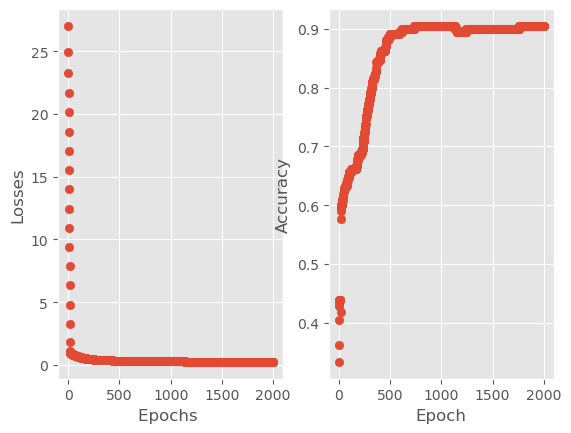

In [6]:
# simple model without any hidden layer
import warnings
warnings.filterwarnings("ignore")
losses1, acc1 = train(dataset=torch.tensor(data, dtype=torch.float32), num_epochs=num_epochs, lr=lr, 
                                batch_size=batch_size, params=params1, optimizer=optimizer1)            
style.use("ggplot")
plt.subplot(1,2,1)
plt.scatter(range(1, num_epochs+1), losses1)
plt.xlabel("Epochs ")
plt.ylabel("Losses")
#plt.legend()
plt.subplot(1,2,2)
plt.scatter(range(1, num_epochs+1), acc1)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

Accuracy 0.29523810744285583
Epoch[1], Current Loss: 0.40043431520462036
Epoch[1], Current Loss: 16.70757484436035
Epoch[1], Current Loss: 1.938862681388855
Epoch[1], Current Loss: 0.5443697571754456



Accuracy 0.3761904835700989
Epoch[2], Current Loss: 0.7348808646202087
Epoch[2], Current Loss: 0.14586667716503143
Epoch[2], Current Loss: 1.7050589323043823
Epoch[2], Current Loss: 0.934746503829956



Accuracy 0.4047619104385376
Epoch[3], Current Loss: 0.6624787449836731
Epoch[3], Current Loss: 0.13272108137607574
Epoch[3], Current Loss: 1.6772019863128662
Epoch[3], Current Loss: 0.9068225026130676



Accuracy 0.41428571939468384
Epoch[4], Current Loss: 0.6192823648452759
Epoch[4], Current Loss: 0.13147090375423431
Epoch[4], Current Loss: 1.627853274345398
Epoch[4], Current Loss: 0.8543344140052795



Accuracy 0.4285714328289032
Epoch[5], Current Loss: 0.5833356380462646
Epoch[5], Current Loss: 0.1305859088897705
Epoch[5], Current Loss: 1.5796736478805542
Epoch[5], Current Loss: 0.804

Epoch[54], Current Loss: 0.17998626828193665



Accuracy 0.6523809432983398
Epoch[55], Current Loss: 0.29222968220710754
Epoch[55], Current Loss: 0.1343086212873459
Epoch[55], Current Loss: 0.4943670332431793
Epoch[55], Current Loss: 0.1782565414905548



Accuracy 0.6523809432983398
Epoch[56], Current Loss: 0.29259586334228516
Epoch[56], Current Loss: 0.1343899816274643
Epoch[56], Current Loss: 0.48777148127555847
Epoch[56], Current Loss: 0.17660929262638092



Accuracy 0.6523809432983398
Epoch[57], Current Loss: 0.2930021286010742
Epoch[57], Current Loss: 0.13446518778800964
Epoch[57], Current Loss: 0.4814514219760895
Epoch[57], Current Loss: 0.1750405877828598



Accuracy 0.6571428775787354
Epoch[58], Current Loss: 0.29344841837882996
Epoch[58], Current Loss: 0.13453362882137299
Epoch[58], Current Loss: 0.47539761662483215
Epoch[58], Current Loss: 0.17354647815227509



Accuracy 0.6571428775787354
Epoch[59], Current Loss: 0.29392799735069275
Epoch[59], Current Loss: 0.134596496820449

Epoch[94], Current Loss: 0.36325398087501526
Epoch[94], Current Loss: 0.1476709246635437



Accuracy 0.7142857313156128
Epoch[95], Current Loss: 0.3225242495536804
Epoch[95], Current Loss: 0.1341775804758072
Epoch[95], Current Loss: 0.36183497309684753
Epoch[95], Current Loss: 0.14737895131111145



Accuracy 0.7142857313156128
Epoch[96], Current Loss: 0.3234108090400696
Epoch[96], Current Loss: 0.13411617279052734
Epoch[96], Current Loss: 0.3604685962200165
Epoch[96], Current Loss: 0.14709928631782532



Accuracy 0.7142857313156128
Epoch[97], Current Loss: 0.3242965340614319
Epoch[97], Current Loss: 0.1340532898902893
Epoch[97], Current Loss: 0.3591514527797699
Epoch[97], Current Loss: 0.14683032035827637



Accuracy 0.7190476059913635
Epoch[98], Current Loss: 0.325178861618042
Epoch[98], Current Loss: 0.13398835062980652
Epoch[98], Current Loss: 0.3578803241252899
Epoch[98], Current Loss: 0.1465734839439392



Accuracy 0.7190476059913635
Epoch[99], Current Loss: 0.3260592520236969
Epo




Accuracy 0.7857142686843872
Epoch[148], Current Loss: 0.3637025058269501
Epoch[148], Current Loss: 0.12911665439605713
Epoch[148], Current Loss: 0.33017560839653015
Epoch[148], Current Loss: 0.1414487212896347



Accuracy 0.7857142686843872
Epoch[149], Current Loss: 0.36434081196784973
Epoch[149], Current Loss: 0.12899576127529144
Epoch[149], Current Loss: 0.33004462718963623
Epoch[149], Current Loss: 0.14142394065856934



Accuracy 0.7857142686843872
Epoch[150], Current Loss: 0.3649745583534241
Epoch[150], Current Loss: 0.1288735270500183
Epoch[150], Current Loss: 0.3299228549003601
Epoch[150], Current Loss: 0.14140063524246216



Accuracy 0.7857142686843872
Epoch[151], Current Loss: 0.36560285091400146
Epoch[151], Current Loss: 0.1287505179643631
Epoch[151], Current Loss: 0.3298121392726898
Epoch[151], Current Loss: 0.14137865602970123



Accuracy 0.7904762029647827
Epoch[152], Current Loss: 0.36622679233551025
Epoch[152], Current Loss: 0.12862758338451385
Epoch[152], Current Loss

Epoch[195], Current Loss: 0.12284291535615921
Epoch[195], Current Loss: 0.3316197395324707
Epoch[195], Current Loss: 0.14101867377758026



Accuracy 0.7904762029647827
Epoch[196], Current Loss: 0.3890379071235657
Epoch[196], Current Loss: 0.1227010041475296
Epoch[196], Current Loss: 0.3317700922489166
Epoch[196], Current Loss: 0.14101463556289673



Accuracy 0.7952380776405334
Epoch[197], Current Loss: 0.38946259021759033
Epoch[197], Current Loss: 0.12255775183439255
Epoch[197], Current Loss: 0.3319230079650879
Epoch[197], Current Loss: 0.14101144671440125



Accuracy 0.7952380776405334
Epoch[198], Current Loss: 0.3898826241493225
Epoch[198], Current Loss: 0.12241444736719131
Epoch[198], Current Loss: 0.3320798873901367
Epoch[198], Current Loss: 0.14100801944732666



Accuracy 0.7952380776405334
Epoch[199], Current Loss: 0.3902992606163025
Epoch[199], Current Loss: 0.1222710907459259
Epoch[199], Current Loss: 0.33224013447761536
Epoch[199], Current Loss: 0.1410040557384491



Accuracy 

Epoch[239], Current Loss: 0.1406969428062439



Accuracy 0.8333333134651184
Epoch[240], Current Loss: 0.4045170843601227
Epoch[240], Current Loss: 0.1162843406200409
Epoch[240], Current Loss: 0.34096387028694153
Epoch[240], Current Loss: 0.14068379998207092



Accuracy 0.8333333134651184
Epoch[241], Current Loss: 0.40480101108551025
Epoch[241], Current Loss: 0.11613747477531433
Epoch[241], Current Loss: 0.34121665358543396
Epoch[241], Current Loss: 0.14067037403583527



Accuracy 0.8333333134651184
Epoch[242], Current Loss: 0.4050832986831665
Epoch[242], Current Loss: 0.11599041521549225
Epoch[242], Current Loss: 0.34147077798843384
Epoch[242], Current Loss: 0.14065754413604736



Accuracy 0.8333333134651184
Epoch[243], Current Loss: 0.4053627550601959
Epoch[243], Current Loss: 0.11584355682134628
Epoch[243], Current Loss: 0.34172502160072327
Epoch[243], Current Loss: 0.14064352214336395



Accuracy 0.8333333134651184
Epoch[244], Current Loss: 0.40563878417015076
Epoch[244], Current Lo




Accuracy 0.8333333134651184
Epoch[296], Current Loss: 0.41692256927490234
Epoch[296], Current Loss: 0.10820312052965164
Epoch[296], Current Loss: 0.3566286265850067
Epoch[296], Current Loss: 0.1394965797662735



Accuracy 0.8333333134651184
Epoch[297], Current Loss: 0.4170878827571869
Epoch[297], Current Loss: 0.10806285589933395
Epoch[297], Current Loss: 0.3569282293319702
Epoch[297], Current Loss: 0.1394675076007843



Accuracy 0.8333333134651184
Epoch[298], Current Loss: 0.4172520637512207
Epoch[298], Current Loss: 0.10792294889688492
Epoch[298], Current Loss: 0.35722458362579346
Epoch[298], Current Loss: 0.13943803310394287



Accuracy 0.8333333134651184
Epoch[299], Current Loss: 0.4174134135246277
Epoch[299], Current Loss: 0.10778360813856125
Epoch[299], Current Loss: 0.3575257360935211
Epoch[299], Current Loss: 0.1394084095954895



Accuracy 0.8333333134651184
Epoch[300], Current Loss: 0.4175752103328705
Epoch[300], Current Loss: 0.10764356702566147
Epoch[300], Current Loss: 0

Epoch[352], Current Loss: 0.13750997185707092



Accuracy 0.8380952477455139
Epoch[353], Current Loss: 0.4240301549434662
Epoch[353], Current Loss: 0.10057800263166428
Epoch[353], Current Loss: 0.3739771246910095
Epoch[353], Current Loss: 0.13746914267539978



Accuracy 0.8380952477455139
Epoch[354], Current Loss: 0.42411842942237854
Epoch[354], Current Loss: 0.10045037418603897
Epoch[354], Current Loss: 0.37428387999534607
Epoch[354], Current Loss: 0.13742776215076447



Accuracy 0.8380952477455139
Epoch[355], Current Loss: 0.42420580983161926
Epoch[355], Current Loss: 0.10032407939434052
Epoch[355], Current Loss: 0.3745894432067871
Epoch[355], Current Loss: 0.13738630712032318



Accuracy 0.8380952477455139
Epoch[356], Current Loss: 0.42429256439208984
Epoch[356], Current Loss: 0.10019844770431519
Epoch[356], Current Loss: 0.37489569187164307
Epoch[356], Current Loss: 0.13734453916549683



Accuracy 0.8380952477455139
Epoch[357], Current Loss: 0.4243772029876709
Epoch[357], Current L

Epoch[408], Current Loss: 0.3906305134296417
Epoch[408], Current Loss: 0.13499796390533447



Accuracy 0.8333333134651184
Epoch[409], Current Loss: 0.42757245898246765
Epoch[409], Current Loss: 0.09386572241783142
Epoch[409], Current Loss: 0.3909282684326172
Epoch[409], Current Loss: 0.13495007157325745



Accuracy 0.8380952477455139
Epoch[410], Current Loss: 0.427613765001297
Epoch[410], Current Loss: 0.09375301748514175
Epoch[410], Current Loss: 0.39122432470321655
Epoch[410], Current Loss: 0.13490206003189087



Accuracy 0.8380952477455139
Epoch[411], Current Loss: 0.4276539087295532
Epoch[411], Current Loss: 0.09364055842161179
Epoch[411], Current Loss: 0.3915225863456726
Epoch[411], Current Loss: 0.13485397398471832



Accuracy 0.8380952477455139
Epoch[412], Current Loss: 0.42769256234169006
Epoch[412], Current Loss: 0.09352866560220718
Epoch[412], Current Loss: 0.39182016253471375
Epoch[412], Current Loss: 0.13480569422245026



Accuracy 0.8380952477455139
Epoch[413], Current Los

Epoch[458], Current Loss: 0.40516436100006104
Epoch[458], Current Loss: 0.13252153992652893



Accuracy 0.8476190567016602
Epoch[459], Current Loss: 0.42888912558555603
Epoch[459], Current Loss: 0.08852910995483398
Epoch[459], Current Loss: 0.40544652938842773
Epoch[459], Current Loss: 0.13247111439704895



Accuracy 0.8476190567016602
Epoch[460], Current Loss: 0.42890214920043945
Epoch[460], Current Loss: 0.0884278193116188
Epoch[460], Current Loss: 0.4057267904281616
Epoch[460], Current Loss: 0.13242049515247345



Accuracy 0.8476190567016602
Epoch[461], Current Loss: 0.42891621589660645
Epoch[461], Current Loss: 0.08832751959562302
Epoch[461], Current Loss: 0.40601038932800293
Epoch[461], Current Loss: 0.132369726896286



Accuracy 0.8476190567016602
Epoch[462], Current Loss: 0.42892739176750183
Epoch[462], Current Loss: 0.08822736889123917
Epoch[462], Current Loss: 0.4062926471233368
Epoch[462], Current Loss: 0.13231885433197021



Accuracy 0.8476190567016602
Epoch[463], Current Lo

Epoch[499], Current Loss: 0.4291122853755951
Epoch[499], Current Loss: 0.08467067033052444
Epoch[499], Current Loss: 0.41648155450820923
Epoch[499], Current Loss: 0.13043007254600525



Accuracy 0.8476190567016602
Epoch[500], Current Loss: 0.4291103482246399
Epoch[500], Current Loss: 0.08457864820957184
Epoch[500], Current Loss: 0.41675007343292236
Epoch[500], Current Loss: 0.1303786188364029



Accuracy 0.8476190567016602
Epoch[501], Current Loss: 0.42910870909690857
Epoch[501], Current Loss: 0.08448703587055206
Epoch[501], Current Loss: 0.4170176684856415
Epoch[501], Current Loss: 0.13032767176628113



Accuracy 0.8476190567016602
Epoch[502], Current Loss: 0.4291067123413086
Epoch[502], Current Loss: 0.08439518511295319
Epoch[502], Current Loss: 0.41728636622428894
Epoch[502], Current Loss: 0.13027605414390564



Accuracy 0.8476190567016602
Epoch[503], Current Loss: 0.42910417914390564
Epoch[503], Current Loss: 0.08430367708206177
Epoch[503], Current Loss: 0.41755494475364685
Epoch[5

Epoch[548], Current Loss: 0.12793795764446259



Accuracy 0.8523809313774109
Epoch[549], Current Loss: 0.42870137095451355
Epoch[549], Current Loss: 0.0803084447979927
Epoch[549], Current Loss: 0.4294646978378296
Epoch[549], Current Loss: 0.12788794934749603



Accuracy 0.8523809313774109
Epoch[550], Current Loss: 0.42868471145629883
Epoch[550], Current Loss: 0.08022596687078476
Epoch[550], Current Loss: 0.42971622943878174
Epoch[550], Current Loss: 0.12783777713775635



Accuracy 0.8523809313774109
Epoch[551], Current Loss: 0.42867210507392883
Epoch[551], Current Loss: 0.08014391362667084
Epoch[551], Current Loss: 0.42996567487716675
Epoch[551], Current Loss: 0.12778723239898682



Accuracy 0.8523809313774109
Epoch[552], Current Loss: 0.4286562204360962
Epoch[552], Current Loss: 0.08006171882152557
Epoch[552], Current Loss: 0.43021532893180847
Epoch[552], Current Loss: 0.12773734331130981



Accuracy 0.8523809313774109
Epoch[553], Current Loss: 0.428642213344574
Epoch[553], Current Lo

Epoch[595], Current Loss: 0.07669464498758316
Epoch[595], Current Loss: 0.44058123230934143
Epoch[595], Current Loss: 0.12561340630054474



Accuracy 0.8571428656578064
Epoch[596], Current Loss: 0.42785176634788513
Epoch[596], Current Loss: 0.07661972939968109
Epoch[596], Current Loss: 0.4408131539821625
Epoch[596], Current Loss: 0.12556445598602295



Accuracy 0.8571428656578064
Epoch[597], Current Loss: 0.427829772233963
Epoch[597], Current Loss: 0.0765448734164238
Epoch[597], Current Loss: 0.44104620814323425
Epoch[597], Current Loss: 0.1255163699388504



Accuracy 0.8571428656578064
Epoch[598], Current Loss: 0.4278072714805603
Epoch[598], Current Loss: 0.07647102326154709
Epoch[598], Current Loss: 0.44127872586250305
Epoch[598], Current Loss: 0.1254683881998062



Accuracy 0.8571428656578064
Epoch[599], Current Loss: 0.4277867078781128
Epoch[599], Current Loss: 0.0763963907957077
Epoch[599], Current Loss: 0.4415093660354614
Epoch[599], Current Loss: 0.1254197359085083



Accuracy 0

Epoch[644], Current Loss: 0.4515446126461029
Epoch[644], Current Loss: 0.1232963353395462



Accuracy 0.8619047403335571
Epoch[645], Current Loss: 0.4266735017299652
Epoch[645], Current Loss: 0.07314350455999374
Epoch[645], Current Loss: 0.45175719261169434
Epoch[645], Current Loss: 0.1232500746846199



Accuracy 0.8619047403335571
Epoch[646], Current Loss: 0.426645964384079
Epoch[646], Current Loss: 0.07307637482881546
Epoch[646], Current Loss: 0.45197439193725586
Epoch[646], Current Loss: 0.12320417165756226



Accuracy 0.8619047403335571
Epoch[647], Current Loss: 0.4266209006309509
Epoch[647], Current Loss: 0.0730089619755745
Epoch[647], Current Loss: 0.4521869421005249
Epoch[647], Current Loss: 0.12315826863050461



Accuracy 0.8619047403335571
Epoch[648], Current Loss: 0.426594078540802
Epoch[648], Current Loss: 0.07294223457574844
Epoch[648], Current Loss: 0.4524010419845581
Epoch[648], Current Loss: 0.12311219424009323



Accuracy 0.8619047403335571
Epoch[649], Current Loss: 0.4

Epoch[701], Current Loss: 0.4631879925727844
Epoch[701], Current Loss: 0.12076754868030548



Accuracy 0.8714285492897034
Epoch[702], Current Loss: 0.42508935928344727
Epoch[702], Current Loss: 0.06950884312391281
Epoch[702], Current Loss: 0.4633835256099701
Epoch[702], Current Loss: 0.12072514742612839



Accuracy 0.8714285492897034
Epoch[703], Current Loss: 0.4250613749027252
Epoch[703], Current Loss: 0.06944864243268967
Epoch[703], Current Loss: 0.46357542276382446
Epoch[703], Current Loss: 0.12068203091621399



Accuracy 0.8714285492897034
Epoch[704], Current Loss: 0.42503294348716736
Epoch[704], Current Loss: 0.06938830018043518
Epoch[704], Current Loss: 0.4637683928012848
Epoch[704], Current Loss: 0.1206398457288742



Accuracy 0.8714285492897034
Epoch[705], Current Loss: 0.42500320076942444
Epoch[705], Current Loss: 0.06932835280895233
Epoch[705], Current Loss: 0.46396079659461975
Epoch[705], Current Loss: 0.12059733271598816



Accuracy 0.8714285492897034
Epoch[706], Current Lo

Epoch[743], Current Loss: 0.4710316061973572
Epoch[743], Current Loss: 0.11902835220098495



Accuracy 0.8809523582458496
Epoch[744], Current Loss: 0.42384999990463257
Epoch[744], Current Loss: 0.06707501411437988
Epoch[744], Current Loss: 0.4712132513523102
Epoch[744], Current Loss: 0.11898843944072723



Accuracy 0.8809523582458496
Epoch[745], Current Loss: 0.4238203763961792
Epoch[745], Current Loss: 0.06701912730932236
Epoch[745], Current Loss: 0.4713909327983856
Epoch[745], Current Loss: 0.11894844472408295



Accuracy 0.8809523582458496
Epoch[746], Current Loss: 0.42378926277160645
Epoch[746], Current Loss: 0.06696358323097229
Epoch[746], Current Loss: 0.47156956791877747
Epoch[746], Current Loss: 0.11890847980976105



Accuracy 0.8809523582458496
Epoch[747], Current Loss: 0.42375943064689636
Epoch[747], Current Loss: 0.06690796464681625
Epoch[747], Current Loss: 0.47174906730651855
Epoch[747], Current Loss: 0.1188681423664093



Accuracy 0.8809523582458496
Epoch[748], Current Lo

Accuracy 0.8809523582458496
Epoch[782], Current Loss: 0.42270559072494507
Epoch[782], Current Loss: 0.06502975523471832
Epoch[782], Current Loss: 0.47778117656707764
Epoch[782], Current Loss: 0.11750918626785278



Accuracy 0.8809523582458496
Epoch[783], Current Loss: 0.42267531156539917
Epoch[783], Current Loss: 0.0649777352809906
Epoch[783], Current Loss: 0.47794899344444275
Epoch[783], Current Loss: 0.1174716129899025



Accuracy 0.8809523582458496
Epoch[784], Current Loss: 0.4226444661617279
Epoch[784], Current Loss: 0.06492623686790466
Epoch[784], Current Loss: 0.4781169593334198
Epoch[784], Current Loss: 0.11743432283401489



Accuracy 0.8809523582458496
Epoch[785], Current Loss: 0.4226149916648865
Epoch[785], Current Loss: 0.0648738369345665
Epoch[785], Current Loss: 0.4782818853855133
Epoch[785], Current Loss: 0.11739612370729446



Accuracy 0.8809523582458496
Epoch[786], Current Loss: 0.42258501052856445
Epoch[786], Current Loss: 0.06482195854187012
Epoch[786], Current Loss: 0

Epoch[821], Current Loss: 0.4840407371520996
Epoch[821], Current Loss: 0.1160808801651001



Accuracy 0.8809523582458496
Epoch[822], Current Loss: 0.4214990735054016
Epoch[822], Current Loss: 0.06302092224359512
Epoch[822], Current Loss: 0.4841937720775604
Epoch[822], Current Loss: 0.11604570597410202



Accuracy 0.8809523582458496
Epoch[823], Current Loss: 0.42146846652030945
Epoch[823], Current Loss: 0.0629727691411972
Epoch[823], Current Loss: 0.4843485355377197
Epoch[823], Current Loss: 0.11601000279188156



Accuracy 0.8809523582458496
Epoch[824], Current Loss: 0.42143771052360535
Epoch[824], Current Loss: 0.06292412430047989
Epoch[824], Current Loss: 0.4845014214515686
Epoch[824], Current Loss: 0.1159747838973999



Accuracy 0.8809523582458496
Epoch[825], Current Loss: 0.4214075207710266
Epoch[825], Current Loss: 0.06287601590156555
Epoch[825], Current Loss: 0.4846530854701996
Epoch[825], Current Loss: 0.1159399002790451



Accuracy 0.8809523582458496
Epoch[826], Current Loss: 0.




Accuracy 0.8809523582458496
Epoch[861], Current Loss: 0.4203290045261383
Epoch[861], Current Loss: 0.06119168549776077
Epoch[861], Current Loss: 0.48996925354003906
Epoch[861], Current Loss: 0.11470814794301987



Accuracy 0.8809523582458496
Epoch[862], Current Loss: 0.4203009009361267
Epoch[862], Current Loss: 0.06114631146192551
Epoch[862], Current Loss: 0.4901115298271179
Epoch[862], Current Loss: 0.11467491090297699



Accuracy 0.8809523582458496
Epoch[863], Current Loss: 0.4202706515789032
Epoch[863], Current Loss: 0.06110117584466934
Epoch[863], Current Loss: 0.49025464057922363
Epoch[863], Current Loss: 0.1146416887640953



Accuracy 0.8809523582458496
Epoch[864], Current Loss: 0.4202405512332916
Epoch[864], Current Loss: 0.061055511236190796
Epoch[864], Current Loss: 0.4903966784477234
Epoch[864], Current Loss: 0.11460863798856735



Accuracy 0.8809523582458496
Epoch[865], Current Loss: 0.4202105402946472
Epoch[865], Current Loss: 0.061010558158159256
Epoch[865], Current Los

Epoch[908], Current Loss: 0.059138111770153046
Epoch[908], Current Loss: 0.4963417649269104
Epoch[908], Current Loss: 0.11320747435092926



Accuracy 0.8809523582458496
Epoch[909], Current Loss: 0.41891810297966003
Epoch[909], Current Loss: 0.05909651517868042
Epoch[909], Current Loss: 0.49647092819213867
Epoch[909], Current Loss: 0.11317699402570724



Accuracy 0.8809523582458496
Epoch[910], Current Loss: 0.4188879728317261
Epoch[910], Current Loss: 0.05905425548553467
Epoch[910], Current Loss: 0.49659883975982666
Epoch[910], Current Loss: 0.11314649134874344



Accuracy 0.8809523582458496
Epoch[911], Current Loss: 0.4188593029975891
Epoch[911], Current Loss: 0.05901261419057846
Epoch[911], Current Loss: 0.49672868847846985
Epoch[911], Current Loss: 0.11311593651771545



Accuracy 0.8809523582458496
Epoch[912], Current Loss: 0.41882768273353577
Epoch[912], Current Loss: 0.05897076055407524
Epoch[912], Current Loss: 0.49685680866241455
Epoch[912], Current Loss: 0.11308533698320389



A

Epoch[955], Current Loss: 0.4175933301448822
Epoch[955], Current Loss: 0.05723259598016739
Epoch[955], Current Loss: 0.5021094679832458
Epoch[955], Current Loss: 0.11182285100221634



Accuracy 0.8809523582458496
Epoch[956], Current Loss: 0.4175650179386139
Epoch[956], Current Loss: 0.05719384923577309
Epoch[956], Current Loss: 0.5022259950637817
Epoch[956], Current Loss: 0.11179433763027191



Accuracy 0.8809523582458496
Epoch[957], Current Loss: 0.41753682494163513
Epoch[957], Current Loss: 0.05715436115860939
Epoch[957], Current Loss: 0.5023409724235535
Epoch[957], Current Loss: 0.11176609247922897



Accuracy 0.8809523582458496
Epoch[958], Current Loss: 0.41750869154930115
Epoch[958], Current Loss: 0.05711564049124718
Epoch[958], Current Loss: 0.5024569630622864
Epoch[958], Current Loss: 0.11173781007528305



Accuracy 0.8809523582458496
Epoch[959], Current Loss: 0.4174808859825134
Epoch[959], Current Loss: 0.05707672983407974
Epoch[959], Current Loss: 0.5025737285614014
Epoch[959]

Epoch[995], Current Loss: 0.11072855442762375



Accuracy 0.8857142925262451
Epoch[996], Current Loss: 0.41644683480262756
Epoch[996], Current Loss: 0.05567871779203415
Epoch[996], Current Loss: 0.5066750049591064
Epoch[996], Current Loss: 0.1107020452618599



Accuracy 0.8857142925262451
Epoch[997], Current Loss: 0.41641658544540405
Epoch[997], Current Loss: 0.055642277002334595
Epoch[997], Current Loss: 0.5067813992500305
Epoch[997], Current Loss: 0.11067573726177216



Accuracy 0.8857142925262451
Epoch[998], Current Loss: 0.4163913428783417
Epoch[998], Current Loss: 0.055604878813028336
Epoch[998], Current Loss: 0.5068863034248352
Epoch[998], Current Loss: 0.11064945161342621



Accuracy 0.8857142925262451
Epoch[999], Current Loss: 0.41636309027671814
Epoch[999], Current Loss: 0.05556877702474594
Epoch[999], Current Loss: 0.5069931745529175
Epoch[999], Current Loss: 0.11062296479940414



Accuracy 0.8857142925262451
Epoch[1000], Current Loss: 0.41633567214012146
Epoch[1000], Current

Epoch[1042], Current Loss: 0.10953468084335327



Accuracy 0.8904761672019958
Epoch[1043], Current Loss: 0.41516461968421936
Epoch[1043], Current Loss: 0.054009389132261276
Epoch[1043], Current Loss: 0.5114094614982605
Epoch[1043], Current Loss: 0.10951030999422073



Accuracy 0.8904761672019958
Epoch[1044], Current Loss: 0.4151374101638794
Epoch[1044], Current Loss: 0.05397515371441841
Epoch[1044], Current Loss: 0.511504590511322
Epoch[1044], Current Loss: 0.10948625952005386



Accuracy 0.8904761672019958
Epoch[1045], Current Loss: 0.4151097536087036
Epoch[1045], Current Loss: 0.05394076555967331
Epoch[1045], Current Loss: 0.5115979313850403
Epoch[1045], Current Loss: 0.10946216434240341



Accuracy 0.8904761672019958
Epoch[1046], Current Loss: 0.41508159041404724
Epoch[1046], Current Loss: 0.053906720131635666
Epoch[1046], Current Loss: 0.5116944313049316
Epoch[1046], Current Loss: 0.10943756997585297



Accuracy 0.8904761672019958
Epoch[1047], Current Loss: 0.4150557518005371
Epoch

Epoch[1093], Current Loss: 0.5158985257148743
Epoch[1093], Current Loss: 0.10834253579378128



Accuracy 0.8904761672019958
Epoch[1094], Current Loss: 0.41381266713142395
Epoch[1094], Current Loss: 0.05231968313455582
Epoch[1094], Current Loss: 0.515985369682312
Epoch[1094], Current Loss: 0.10832013189792633



Accuracy 0.8904761672019958
Epoch[1095], Current Loss: 0.4137874245643616
Epoch[1095], Current Loss: 0.05228765308856964
Epoch[1095], Current Loss: 0.5160689949989319
Epoch[1095], Current Loss: 0.10829820483922958



Accuracy 0.8904761672019958
Epoch[1096], Current Loss: 0.4137619733810425
Epoch[1096], Current Loss: 0.05225534737110138
Epoch[1096], Current Loss: 0.5161505341529846
Epoch[1096], Current Loss: 0.10827582329511642



Accuracy 0.8904761672019958
Epoch[1097], Current Loss: 0.41373541951179504
Epoch[1097], Current Loss: 0.05222384259104729
Epoch[1097], Current Loss: 0.5162352919578552
Epoch[1097], Current Loss: 0.10825403034687042



Accuracy 0.8904761672019958
Epoch[1

Epoch[1135], Current Loss: 0.05104435607790947
Epoch[1135], Current Loss: 0.5192652940750122
Epoch[1135], Current Loss: 0.10743581503629684



Accuracy 0.8904761672019958
Epoch[1136], Current Loss: 0.4127313792705536
Epoch[1136], Current Loss: 0.051013678312301636
Epoch[1136], Current Loss: 0.5193395614624023
Epoch[1136], Current Loss: 0.10741487890481949



Accuracy 0.8904761672019958
Epoch[1137], Current Loss: 0.4127056300640106
Epoch[1137], Current Loss: 0.050984013825654984
Epoch[1137], Current Loss: 0.5194162726402283
Epoch[1137], Current Loss: 0.10739419609308243



Accuracy 0.8904761672019958
Epoch[1138], Current Loss: 0.41268008947372437
Epoch[1138], Current Loss: 0.05095373094081879
Epoch[1138], Current Loss: 0.5194941163063049
Epoch[1138], Current Loss: 0.10737336426973343



Accuracy 0.8904761672019958
Epoch[1139], Current Loss: 0.41265571117401123
Epoch[1139], Current Loss: 0.050923191010951996
Epoch[1139], Current Loss: 0.5195679068565369
Epoch[1139], Current Loss: 0.10735

Epoch[1180], Current Loss: 0.04972154274582863
Epoch[1180], Current Loss: 0.5224875807762146
Epoch[1180], Current Loss: 0.106532022356987



Accuracy 0.8904761672019958
Epoch[1181], Current Loss: 0.411601722240448
Epoch[1181], Current Loss: 0.04969296604394913
Epoch[1181], Current Loss: 0.5225517153739929
Epoch[1181], Current Loss: 0.10651244223117828



Accuracy 0.8904761672019958
Epoch[1182], Current Loss: 0.41157785058021545
Epoch[1182], Current Loss: 0.049664441496133804
Epoch[1182], Current Loss: 0.5226210951805115
Epoch[1182], Current Loss: 0.1064932644367218



Accuracy 0.8904761672019958
Epoch[1183], Current Loss: 0.41155365109443665
Epoch[1183], Current Loss: 0.04963598772883415
Epoch[1183], Current Loss: 0.5226893424987793
Epoch[1183], Current Loss: 0.10647377371788025



Accuracy 0.8904761672019958
Epoch[1184], Current Loss: 0.41152751445770264
Epoch[1184], Current Loss: 0.04960772022604942
Epoch[1184], Current Loss: 0.5227545499801636
Epoch[1184], Current Loss: 0.1064550578

Epoch[1229], Current Loss: 0.41042816638946533
Epoch[1229], Current Loss: 0.04836520180106163
Epoch[1229], Current Loss: 0.5255750417709351
Epoch[1229], Current Loss: 0.10562184453010559



Accuracy 0.8904761672019958
Epoch[1230], Current Loss: 0.41040387749671936
Epoch[1230], Current Loss: 0.04833817481994629
Epoch[1230], Current Loss: 0.5256327986717224
Epoch[1230], Current Loss: 0.10560381412506104



Accuracy 0.8904761672019958
Epoch[1231], Current Loss: 0.4103798270225525
Epoch[1231], Current Loss: 0.048311345279216766
Epoch[1231], Current Loss: 0.5256913900375366
Epoch[1231], Current Loss: 0.10558619350194931



Accuracy 0.8904761672019958
Epoch[1232], Current Loss: 0.4103558361530304
Epoch[1232], Current Loss: 0.048284679651260376
Epoch[1232], Current Loss: 0.5257523059844971
Epoch[1232], Current Loss: 0.10556836426258087



Accuracy 0.8904761672019958
Epoch[1233], Current Loss: 0.4103313088417053
Epoch[1233], Current Loss: 0.04825775697827339
Epoch[1233], Current Loss: 0.525805

Epoch[1279], Current Loss: 0.40923306345939636
Epoch[1279], Current Loss: 0.047062959522008896
Epoch[1279], Current Loss: 0.528301477432251
Epoch[1279], Current Loss: 0.10476469248533249



Accuracy 0.8904761672019958
Epoch[1280], Current Loss: 0.40920841693878174
Epoch[1280], Current Loss: 0.04703807085752487
Epoch[1280], Current Loss: 0.5283529162406921
Epoch[1280], Current Loss: 0.10474809259176254



Accuracy 0.8904761672019958
Epoch[1281], Current Loss: 0.40918421745300293
Epoch[1281], Current Loss: 0.047012537717819214
Epoch[1281], Current Loss: 0.5284028649330139
Epoch[1281], Current Loss: 0.10473204404115677



Accuracy 0.8904761672019958
Epoch[1282], Current Loss: 0.40916067361831665
Epoch[1282], Current Loss: 0.04698747396469116
Epoch[1282], Current Loss: 0.5284513235092163
Epoch[1282], Current Loss: 0.10471513867378235



Accuracy 0.8904761672019958
Epoch[1283], Current Loss: 0.40913915634155273
Epoch[1283], Current Loss: 0.04696214199066162
Epoch[1283], Current Loss: 0.5285

Epoch[1330], Current Loss: 0.045812398195266724
Epoch[1330], Current Loss: 0.5306779146194458
Epoch[1330], Current Loss: 0.10395856201648712



Accuracy 0.8904761672019958
Epoch[1331], Current Loss: 0.40801703929901123
Epoch[1331], Current Loss: 0.045788563787937164
Epoch[1331], Current Loss: 0.5307188630104065
Epoch[1331], Current Loss: 0.10394345968961716



Accuracy 0.8904761672019958
Epoch[1332], Current Loss: 0.40799543261528015
Epoch[1332], Current Loss: 0.04576500505208969
Epoch[1332], Current Loss: 0.530763566493988
Epoch[1332], Current Loss: 0.1039280965924263



Accuracy 0.8904761672019958
Epoch[1333], Current Loss: 0.40797048807144165
Epoch[1333], Current Loss: 0.045741111040115356
Epoch[1333], Current Loss: 0.5308048129081726
Epoch[1333], Current Loss: 0.10391294956207275



Accuracy 0.8904761672019958
Epoch[1334], Current Loss: 0.4079471528530121
Epoch[1334], Current Loss: 0.04571741819381714
Epoch[1334], Current Loss: 0.5308459401130676
Epoch[1334], Current Loss: 0.103897

Epoch[1383], Current Loss: 0.5327459573745728
Epoch[1383], Current Loss: 0.10318659991025925



Accuracy 0.8952381014823914
Epoch[1384], Current Loss: 0.4068041443824768
Epoch[1384], Current Loss: 0.04456595703959465
Epoch[1384], Current Loss: 0.5327816009521484
Epoch[1384], Current Loss: 0.10317251086235046



Accuracy 0.8952381014823914
Epoch[1385], Current Loss: 0.4067789316177368
Epoch[1385], Current Loss: 0.04454353451728821
Epoch[1385], Current Loss: 0.5328157544136047
Epoch[1385], Current Loss: 0.10315852612257004



Accuracy 0.8952381014823914
Epoch[1386], Current Loss: 0.40675726532936096
Epoch[1386], Current Loss: 0.04452132433652878
Epoch[1386], Current Loss: 0.5328512191772461
Epoch[1386], Current Loss: 0.10314518213272095



Accuracy 0.8952381014823914
Epoch[1387], Current Loss: 0.4067336320877075
Epoch[1387], Current Loss: 0.04449913650751114
Epoch[1387], Current Loss: 0.5328866839408875
Epoch[1387], Current Loss: 0.10313071310520172



Accuracy 0.8952381014823914
Epoch[1

Epoch[1427], Current Loss: 0.40583398938179016
Epoch[1427], Current Loss: 0.043625470250844955
Epoch[1427], Current Loss: 0.5341719388961792
Epoch[1427], Current Loss: 0.10259131342172623



Accuracy 0.8999999761581421
Epoch[1428], Current Loss: 0.4058113694190979
Epoch[1428], Current Loss: 0.043604474514722824
Epoch[1428], Current Loss: 0.5342037677764893
Epoch[1428], Current Loss: 0.10257821530103683



Accuracy 0.8999999761581421
Epoch[1429], Current Loss: 0.40578946471214294
Epoch[1429], Current Loss: 0.04358281195163727
Epoch[1429], Current Loss: 0.5342333912849426
Epoch[1429], Current Loss: 0.10256543010473251



Accuracy 0.8999999761581421
Epoch[1430], Current Loss: 0.4057658612728119
Epoch[1430], Current Loss: 0.04356129840016365
Epoch[1430], Current Loss: 0.5342605710029602
Epoch[1430], Current Loss: 0.10255248099565506



Accuracy 0.8999999761581421
Epoch[1431], Current Loss: 0.40574347972869873
Epoch[1431], Current Loss: 0.0435401052236557
Epoch[1431], Current Loss: 0.534292

Epoch[1480], Current Loss: 0.10192571580410004



Accuracy 0.8999999761581421
Epoch[1481], Current Loss: 0.404633492231369
Epoch[1481], Current Loss: 0.04250429570674896
Epoch[1481], Current Loss: 0.5355913043022156
Epoch[1481], Current Loss: 0.10191360116004944



Accuracy 0.8999999761581421
Epoch[1482], Current Loss: 0.4046119153499603
Epoch[1482], Current Loss: 0.042483847588300705
Epoch[1482], Current Loss: 0.5356121063232422
Epoch[1482], Current Loss: 0.10190146416425705



Accuracy 0.8999999761581421
Epoch[1483], Current Loss: 0.40458956360816956
Epoch[1483], Current Loss: 0.04246411845088005
Epoch[1483], Current Loss: 0.535637378692627
Epoch[1483], Current Loss: 0.10188952833414078



Accuracy 0.8999999761581421
Epoch[1484], Current Loss: 0.404568076133728
Epoch[1484], Current Loss: 0.04244401305913925
Epoch[1484], Current Loss: 0.5356601476669312
Epoch[1484], Current Loss: 0.10187731683254242



Accuracy 0.8999999761581421
Epoch[1485], Current Loss: 0.4045449495315552
Epoch[148

Epoch[1519], Current Loss: 0.5363844037055969
Epoch[1519], Current Loss: 0.10146801918745041



Accuracy 0.8999999761581421
Epoch[1520], Current Loss: 0.40377792716026306
Epoch[1520], Current Loss: 0.041733287274837494
Epoch[1520], Current Loss: 0.536406397819519
Epoch[1520], Current Loss: 0.10145673155784607



Accuracy 0.8999999761581421
Epoch[1521], Current Loss: 0.4037558436393738
Epoch[1521], Current Loss: 0.04171386733651161
Epoch[1521], Current Loss: 0.536423921585083
Epoch[1521], Current Loss: 0.10144473612308502



Accuracy 0.8999999761581421
Epoch[1522], Current Loss: 0.4037337303161621
Epoch[1522], Current Loss: 0.041694607585668564
Epoch[1522], Current Loss: 0.5364415645599365
Epoch[1522], Current Loss: 0.1014338806271553



Accuracy 0.8999999761581421
Epoch[1523], Current Loss: 0.40371179580688477
Epoch[1523], Current Loss: 0.04167493060231209
Epoch[1523], Current Loss: 0.5364603400230408
Epoch[1523], Current Loss: 0.10142222791910172



Accuracy 0.8999999761581421
Epoch[1

Epoch[1574], Current Loss: 0.5372580289840698
Epoch[1574], Current Loss: 0.10086438804864883



Accuracy 0.8999999761581421
Epoch[1575], Current Loss: 0.4025822877883911
Epoch[1575], Current Loss: 0.04069599509239197
Epoch[1575], Current Loss: 0.5372690558433533
Epoch[1575], Current Loss: 0.10085408389568329



Accuracy 0.8999999761581421
Epoch[1576], Current Loss: 0.40255990624427795
Epoch[1576], Current Loss: 0.040678199380636215
Epoch[1576], Current Loss: 0.5372837781906128
Epoch[1576], Current Loss: 0.10084354877471924



Accuracy 0.8999999761581421
Epoch[1577], Current Loss: 0.4025377929210663
Epoch[1577], Current Loss: 0.040659863501787186
Epoch[1577], Current Loss: 0.5372945666313171
Epoch[1577], Current Loss: 0.1008332148194313



Accuracy 0.8999999761581421
Epoch[1578], Current Loss: 0.40251678228378296
Epoch[1578], Current Loss: 0.04064122959971428
Epoch[1578], Current Loss: 0.5373058319091797
Epoch[1578], Current Loss: 0.10082266479730606



Accuracy 0.8999999761581421
Epoch

Epoch[1631], Current Loss: 0.1002865582704544



Accuracy 0.8999999761581421
Epoch[1632], Current Loss: 0.4013519287109375
Epoch[1632], Current Loss: 0.03967942297458649
Epoch[1632], Current Loss: 0.5378430485725403
Epoch[1632], Current Loss: 0.10027715563774109



Accuracy 0.8999999761581421
Epoch[1633], Current Loss: 0.4013313055038452
Epoch[1633], Current Loss: 0.03966222330927849
Epoch[1633], Current Loss: 0.5378523468971252
Epoch[1633], Current Loss: 0.10026733577251434



Accuracy 0.8999999761581421
Epoch[1634], Current Loss: 0.40130743384361267
Epoch[1634], Current Loss: 0.03964495286345482
Epoch[1634], Current Loss: 0.53785640001297
Epoch[1634], Current Loss: 0.10025768727064133



Accuracy 0.8999999761581421
Epoch[1635], Current Loss: 0.4012880325317383
Epoch[1635], Current Loss: 0.039627447724342346
Epoch[1635], Current Loss: 0.5378637313842773
Epoch[1635], Current Loss: 0.10024780035018921



Accuracy 0.8999999761581421
Epoch[1636], Current Loss: 0.40126535296440125
Epoch[16

Epoch[1684], Current Loss: 0.0387992188334465
Epoch[1684], Current Loss: 0.5381015539169312
Epoch[1684], Current Loss: 0.0997900441288948



Accuracy 0.9047619104385376
Epoch[1685], Current Loss: 0.4002198278903961
Epoch[1685], Current Loss: 0.03878245875239372
Epoch[1685], Current Loss: 0.5381027460098267
Epoch[1685], Current Loss: 0.09978088736534119



Accuracy 0.9047619104385376
Epoch[1686], Current Loss: 0.4001954197883606
Epoch[1686], Current Loss: 0.03876615688204765
Epoch[1686], Current Loss: 0.5381064414978027
Epoch[1686], Current Loss: 0.09977222979068756



Accuracy 0.9047619104385376
Epoch[1687], Current Loss: 0.40017589926719666
Epoch[1687], Current Loss: 0.03874944522976875
Epoch[1687], Current Loss: 0.5381078720092773
Epoch[1687], Current Loss: 0.09976284950971603



Accuracy 0.9047619104385376
Epoch[1688], Current Loss: 0.4001537561416626
Epoch[1688], Current Loss: 0.038733310997486115
Epoch[1688], Current Loss: 0.5381118059158325
Epoch[1688], Current Loss: 0.0997541099

Epoch[1729], Current Loss: 0.09939543902873993



Accuracy 0.9047619104385376
Epoch[1730], Current Loss: 0.3992611765861511
Epoch[1730], Current Loss: 0.03805486485362053
Epoch[1730], Current Loss: 0.5381340384483337
Epoch[1730], Current Loss: 0.09938717633485794



Accuracy 0.9047619104385376
Epoch[1731], Current Loss: 0.3992389142513275
Epoch[1731], Current Loss: 0.038039278239011765
Epoch[1731], Current Loss: 0.5381327867507935
Epoch[1731], Current Loss: 0.09937840700149536



Accuracy 0.9047619104385376
Epoch[1732], Current Loss: 0.3992176949977875
Epoch[1732], Current Loss: 0.03802339732646942
Epoch[1732], Current Loss: 0.538131058216095
Epoch[1732], Current Loss: 0.09936989098787308



Accuracy 0.9047619104385376
Epoch[1733], Current Loss: 0.3991967439651489
Epoch[1733], Current Loss: 0.038007620722055435
Epoch[1733], Current Loss: 0.5381299257278442
Epoch[1733], Current Loss: 0.09936157613992691



Accuracy 0.9047619104385376
Epoch[1734], Current Loss: 0.39917510747909546
Epoch[

Epoch[1773], Current Loss: 0.0990312322974205



Accuracy 0.9047619104385376
Epoch[1774], Current Loss: 0.39832594990730286
Epoch[1774], Current Loss: 0.037371546030044556
Epoch[1774], Current Loss: 0.5380032658576965
Epoch[1774], Current Loss: 0.09902282804250717



Accuracy 0.9047619104385376
Epoch[1775], Current Loss: 0.3983061909675598
Epoch[1775], Current Loss: 0.03735644742846489
Epoch[1775], Current Loss: 0.5380005240440369
Epoch[1775], Current Loss: 0.09901488572359085



Accuracy 0.9047619104385376
Epoch[1776], Current Loss: 0.39828434586524963
Epoch[1776], Current Loss: 0.03734121471643448
Epoch[1776], Current Loss: 0.537996768951416
Epoch[1776], Current Loss: 0.099006786942482



Accuracy 0.9047619104385376
Epoch[1777], Current Loss: 0.3982638418674469
Epoch[1777], Current Loss: 0.03732609748840332
Epoch[1777], Current Loss: 0.5379905104637146
Epoch[1777], Current Loss: 0.09899850934743881



Accuracy 0.9047619104385376
Epoch[1778], Current Loss: 0.39824217557907104
Epoch[17

Epoch[1817], Current Loss: 0.09868646413087845



Accuracy 0.9047619104385376
Epoch[1818], Current Loss: 0.3973945677280426
Epoch[1818], Current Loss: 0.0367145799100399
Epoch[1818], Current Loss: 0.5377308130264282
Epoch[1818], Current Loss: 0.09867914766073227



Accuracy 0.9047619104385376
Epoch[1819], Current Loss: 0.39737236499786377
Epoch[1819], Current Loss: 0.03669997677206993
Epoch[1819], Current Loss: 0.5377237200737
Epoch[1819], Current Loss: 0.09867139160633087



Accuracy 0.9047619104385376
Epoch[1820], Current Loss: 0.39735183119773865
Epoch[1820], Current Loss: 0.03668545186519623
Epoch[1820], Current Loss: 0.5377168655395508
Epoch[1820], Current Loss: 0.09866421669721603



Accuracy 0.9047619104385376
Epoch[1821], Current Loss: 0.3973299562931061
Epoch[1821], Current Loss: 0.0366707406938076
Epoch[1821], Current Loss: 0.537706732749939
Epoch[1821], Current Loss: 0.09865662455558777



Accuracy 0.9047619104385376
Epoch[1822], Current Loss: 0.397307813167572
Epoch[1822], 

Epoch[1865], Current Loss: 0.5372835397720337
Epoch[1865], Current Loss: 0.09833192080259323



Accuracy 0.9047619104385376
Epoch[1866], Current Loss: 0.396377295255661
Epoch[1866], Current Loss: 0.03602579981088638
Epoch[1866], Current Loss: 0.5372732877731323
Epoch[1866], Current Loss: 0.09832491725683212



Accuracy 0.9047619104385376
Epoch[1867], Current Loss: 0.3963569402694702
Epoch[1867], Current Loss: 0.036011580377817154
Epoch[1867], Current Loss: 0.5372613072395325
Epoch[1867], Current Loss: 0.09831813722848892



Accuracy 0.9047619104385376
Epoch[1868], Current Loss: 0.3963354825973511
Epoch[1868], Current Loss: 0.03599749505519867
Epoch[1868], Current Loss: 0.5372492074966431
Epoch[1868], Current Loss: 0.0983106791973114



Accuracy 0.9047619104385376
Epoch[1869], Current Loss: 0.3963148593902588
Epoch[1869], Current Loss: 0.035983551293611526
Epoch[1869], Current Loss: 0.5372382402420044
Epoch[1869], Current Loss: 0.0983034074306488



Accuracy 0.9047619104385376
Epoch[187

Epoch[1905], Current Loss: 0.03548608347773552
Epoch[1905], Current Loss: 0.5367871522903442
Epoch[1905], Current Loss: 0.09805209189653397



Accuracy 0.9047619104385376
Epoch[1906], Current Loss: 0.39553117752075195
Epoch[1906], Current Loss: 0.035472527146339417
Epoch[1906], Current Loss: 0.5367738008499146
Epoch[1906], Current Loss: 0.09804486483335495



Accuracy 0.9047619104385376
Epoch[1907], Current Loss: 0.3955097794532776
Epoch[1907], Current Loss: 0.03545907512307167
Epoch[1907], Current Loss: 0.536759614944458
Epoch[1907], Current Loss: 0.09803804755210876



Accuracy 0.9047619104385376
Epoch[1908], Current Loss: 0.3954886198043823
Epoch[1908], Current Loss: 0.03544521704316139
Epoch[1908], Current Loss: 0.536745548248291
Epoch[1908], Current Loss: 0.09803137928247452



Accuracy 0.9047619104385376
Epoch[1909], Current Loss: 0.3954681158065796
Epoch[1909], Current Loss: 0.03543170541524887
Epoch[1909], Current Loss: 0.5367331504821777
Epoch[1909], Current Loss: 0.0980247929

Epoch[1948], Current Loss: 0.09776507318019867



Accuracy 0.9047619104385376
Epoch[1949], Current Loss: 0.3946201801300049
Epoch[1949], Current Loss: 0.0348983034491539
Epoch[1949], Current Loss: 0.5361238121986389
Epoch[1949], Current Loss: 0.0977589562535286



Accuracy 0.9047619104385376
Epoch[1950], Current Loss: 0.3945969045162201
Epoch[1950], Current Loss: 0.03488543629646301
Epoch[1950], Current Loss: 0.5361074209213257
Epoch[1950], Current Loss: 0.09775232523679733



Accuracy 0.9047619104385376
Epoch[1951], Current Loss: 0.3945769667625427
Epoch[1951], Current Loss: 0.03487243503332138
Epoch[1951], Current Loss: 0.5360910296440125
Epoch[1951], Current Loss: 0.0977458730340004



Accuracy 0.9047619104385376
Epoch[1952], Current Loss: 0.39455491304397583
Epoch[1952], Current Loss: 0.03485935181379318
Epoch[1952], Current Loss: 0.5360750555992126
Epoch[1952], Current Loss: 0.09773946553468704



Accuracy 0.9047619104385376
Epoch[1953], Current Loss: 0.394535094499588
Epoch[1953]

Epoch[1987], Current Loss: 0.3938143253326416
Epoch[1987], Current Loss: 0.0344071164727211
Epoch[1987], Current Loss: 0.5354574918746948
Epoch[1987], Current Loss: 0.09751738607883453



Accuracy 0.9095237851142883
Epoch[1988], Current Loss: 0.3937932848930359
Epoch[1988], Current Loss: 0.03439447283744812
Epoch[1988], Current Loss: 0.5354388356208801
Epoch[1988], Current Loss: 0.09751124680042267



Accuracy 0.9095237851142883
Epoch[1989], Current Loss: 0.3937729299068451
Epoch[1989], Current Loss: 0.03438207507133484
Epoch[1989], Current Loss: 0.5354181528091431
Epoch[1989], Current Loss: 0.09750493615865707



Accuracy 0.9095237851142883
Epoch[1990], Current Loss: 0.39375051856040955
Epoch[1990], Current Loss: 0.03436911106109619
Epoch[1990], Current Loss: 0.5354019403457642
Epoch[1990], Current Loss: 0.09749904274940491



Accuracy 0.9095237851142883
Epoch[1991], Current Loss: 0.39373093843460083
Epoch[1991], Current Loss: 0.03435621038079262
Epoch[1991], Current Loss: 0.535382628

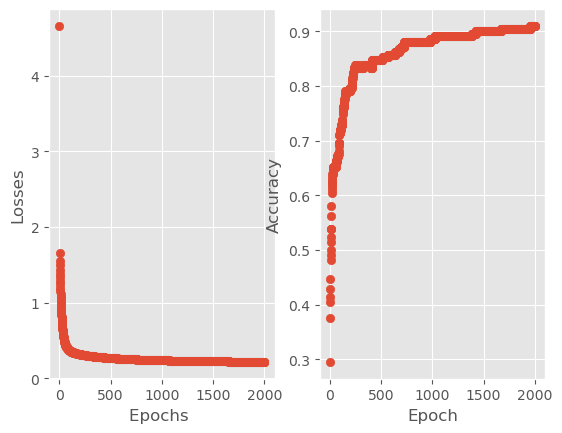

In [7]:
# network will single hidden layer comprising of 8 nodes
# we will use torch.nn.cross_entropy loss due to stable training
import warnings
warnings.filterwarnings("ignore")
losses2, acc2 = train(dataset=torch.tensor(data, dtype=torch.float32), num_epochs=num_epochs, lr=lr, 
                                batch_size=batch_size, params=params2, optimizer=optimizer2)            
style.use("ggplot")
plt.subplot(1,2,1)
plt.scatter(range(1, num_epochs+1), losses2)
plt.xlabel("Epochs ")
plt.ylabel("Losses")
#plt.legend()
plt.subplot(1,2,2)
plt.scatter(range(1, num_epochs+1), acc2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

Accuracy 0.3333333432674408
Epoch[1], Current Loss: 36.598140716552734
Epoch[1], Current Loss: 15.596576690673828
Epoch[1], Current Loss: 3.3203065395355225
Epoch[1], Current Loss: 0.07953808456659317



Accuracy 0.3333333432674408
Epoch[2], Current Loss: 2.482982635498047
Epoch[2], Current Loss: 0.9529958367347717
Epoch[2], Current Loss: 0.8595284223556519
Epoch[2], Current Loss: 0.5770546197891235



Accuracy 0.3333333432674408
Epoch[3], Current Loss: 2.482724666595459
Epoch[3], Current Loss: 0.9567437171936035
Epoch[3], Current Loss: 0.8588623404502869
Epoch[3], Current Loss: 0.565490186214447



Accuracy 0.3333333432674408
Epoch[4], Current Loss: 2.436370611190796
Epoch[4], Current Loss: 0.9477691054344177
Epoch[4], Current Loss: 0.8596431612968445
Epoch[4], Current Loss: 0.5815885663032532



Accuracy 0.3333333432674408
Epoch[5], Current Loss: 2.4725072383880615
Epoch[5], Current Loss: 0.9541151523590088
Epoch[5], Current Loss: 0.8584056496620178
Epoch[5], Current Loss: 0.56696599

Epoch[57], Current Loss: 2.1708106994628906
Epoch[57], Current Loss: 1.0831555128097534
Epoch[57], Current Loss: 0.833087146282196
Epoch[57], Current Loss: 0.3073747158050537



Accuracy 0.3333333432674408
Epoch[58], Current Loss: 2.160991668701172
Epoch[58], Current Loss: 1.109479546546936
Epoch[58], Current Loss: 0.829139232635498
Epoch[58], Current Loss: 0.305932879447937



Accuracy 0.3333333432674408
Epoch[59], Current Loss: 2.1564128398895264
Epoch[59], Current Loss: 1.0975348949432373
Epoch[59], Current Loss: 0.8306704163551331
Epoch[59], Current Loss: 0.3079310953617096



Accuracy 0.3333333432674408
Epoch[60], Current Loss: 2.1483371257781982
Epoch[60], Current Loss: 1.1014554500579834
Epoch[60], Current Loss: 0.8298487067222595
Epoch[60], Current Loss: 0.3069922924041748



Accuracy 0.3333333432674408
Epoch[61], Current Loss: 2.140146255493164
Epoch[61], Current Loss: 1.090564489364624
Epoch[61], Current Loss: 0.8271864652633667
Epoch[61], Current Loss: 0.30636557936668396




Epoch[102], Current Loss: 1.6959749460220337
Epoch[102], Current Loss: 1.3402307033538818
Epoch[102], Current Loss: 0.7882686257362366
Epoch[102], Current Loss: 0.27602219581604004



Accuracy 0.3380952477455139
Epoch[103], Current Loss: 1.6540288925170898
Epoch[103], Current Loss: 1.372661828994751
Epoch[103], Current Loss: 0.7948038578033447
Epoch[103], Current Loss: 0.2532269060611725



Accuracy 0.3380952477455139
Epoch[104], Current Loss: 1.630147933959961
Epoch[104], Current Loss: 1.3920392990112305
Epoch[104], Current Loss: 0.7976036071777344
Epoch[104], Current Loss: 0.2516574561595917



Accuracy 0.3380952477455139
Epoch[105], Current Loss: 1.6099995374679565
Epoch[105], Current Loss: 1.4019895792007446
Epoch[105], Current Loss: 0.7994858026504517
Epoch[105], Current Loss: 0.2513331472873688



Accuracy 0.3380952477455139
Epoch[106], Current Loss: 1.5912277698516846
Epoch[106], Current Loss: 1.4102332592010498
Epoch[106], Current Loss: 0.8015096187591553
Epoch[106], Current Lo




Accuracy 0.46666666865348816
Epoch[159], Current Loss: 1.1067790985107422
Epoch[159], Current Loss: 1.349182367324829
Epoch[159], Current Loss: 0.7465679049491882
Epoch[159], Current Loss: 0.24855481088161469



Accuracy 0.4809523820877075
Epoch[160], Current Loss: 1.1027828454971313
Epoch[160], Current Loss: 1.3408300876617432
Epoch[160], Current Loss: 0.7443332672119141
Epoch[160], Current Loss: 0.24866749346256256



Accuracy 0.4952380955219269
Epoch[161], Current Loss: 1.100980281829834
Epoch[161], Current Loss: 1.3414173126220703
Epoch[161], Current Loss: 0.7437760829925537
Epoch[161], Current Loss: 0.2489204704761505



Accuracy 0.4952380955219269
Epoch[162], Current Loss: 1.0837494134902954
Epoch[162], Current Loss: 1.3317286968231201
Epoch[162], Current Loss: 0.7457285523414612
Epoch[162], Current Loss: 0.25155723094940186



Accuracy 0.5047619342803955
Epoch[163], Current Loss: 1.094074010848999
Epoch[163], Current Loss: 1.3289740085601807
Epoch[163], Current Loss: 0.740319

Epoch[208], Current Loss: 0.695945680141449
Epoch[208], Current Loss: 0.24688903987407684



Accuracy 0.6285714507102966
Epoch[209], Current Loss: 0.9737334847450256
Epoch[209], Current Loss: 1.1784313917160034
Epoch[209], Current Loss: 0.6945275664329529
Epoch[209], Current Loss: 0.24705001711845398



Accuracy 0.6285714507102966
Epoch[210], Current Loss: 0.97276371717453
Epoch[210], Current Loss: 1.174799919128418
Epoch[210], Current Loss: 0.6934326887130737
Epoch[210], Current Loss: 0.24722743034362793



Accuracy 0.6285714507102966
Epoch[211], Current Loss: 0.9714995622634888
Epoch[211], Current Loss: 1.1714105606079102
Epoch[211], Current Loss: 0.6923760771751404
Epoch[211], Current Loss: 0.24739748239517212



Accuracy 0.6285714507102966
Epoch[212], Current Loss: 0.9698697328567505
Epoch[212], Current Loss: 1.1682413816452026
Epoch[212], Current Loss: 0.691378653049469
Epoch[212], Current Loss: 0.24760612845420837



Accuracy 0.6285714507102966
Epoch[213], Current Loss: 0.9680954

Epoch[264], Current Loss: 0.22106696665287018



Accuracy 0.7047619223594666
Epoch[265], Current Loss: 0.8870210647583008
Epoch[265], Current Loss: 1.049545407295227
Epoch[265], Current Loss: 0.652833104133606
Epoch[265], Current Loss: 0.22060434520244598



Accuracy 0.7047619223594666
Epoch[266], Current Loss: 0.8852000832557678
Epoch[266], Current Loss: 1.0465000867843628
Epoch[266], Current Loss: 0.6520547866821289
Epoch[266], Current Loss: 0.2201414257287979



Accuracy 0.7047619223594666
Epoch[267], Current Loss: 0.8833824992179871
Epoch[267], Current Loss: 1.0434805154800415
Epoch[267], Current Loss: 0.6512755155563354
Epoch[267], Current Loss: 0.21967600286006927



Accuracy 0.7047619223594666
Epoch[268], Current Loss: 0.881571352481842
Epoch[268], Current Loss: 1.0404713153839111
Epoch[268], Current Loss: 0.6504974365234375
Epoch[268], Current Loss: 0.21920956671237946



Accuracy 0.7047619223594666
Epoch[269], Current Loss: 0.8797621130943298
Epoch[269], Current Loss: 1.037475

Epoch[317], Current Loss: 0.6285574436187744
Epoch[317], Current Loss: 0.17515648901462555



Accuracy 0.7571428418159485
Epoch[318], Current Loss: 0.7760275602340698
Epoch[318], Current Loss: 0.9203661680221558
Epoch[318], Current Loss: 0.6280674934387207
Epoch[318], Current Loss: 0.17469342052936554



Accuracy 0.7571428418159485
Epoch[319], Current Loss: 0.7745866775512695
Epoch[319], Current Loss: 0.91704261302948
Epoch[319], Current Loss: 0.6272069215774536
Epoch[319], Current Loss: 0.1742304414510727



Accuracy 0.7571428418159485
Epoch[320], Current Loss: 0.7734176516532898
Epoch[320], Current Loss: 0.9143420457839966
Epoch[320], Current Loss: 0.6264842748641968
Epoch[320], Current Loss: 0.17376728355884552



Accuracy 0.761904776096344
Epoch[321], Current Loss: 0.7721542119979858
Epoch[321], Current Loss: 0.9124749302864075
Epoch[321], Current Loss: 0.6259554624557495
Epoch[321], Current Loss: 0.17330554127693176



Accuracy 0.7666666507720947
Epoch[322], Current Loss: 0.770751

Epoch[358], Current Loss: 0.7216987013816833
Epoch[358], Current Loss: 0.8295302391052246
Epoch[358], Current Loss: 0.6121948957443237
Epoch[358], Current Loss: 0.1528075635433197



Accuracy 0.7904762029647827
Epoch[359], Current Loss: 0.7203183174133301
Epoch[359], Current Loss: 0.8275185823440552
Epoch[359], Current Loss: 0.6111438274383545
Epoch[359], Current Loss: 0.15240052342414856



Accuracy 0.7952380776405334
Epoch[360], Current Loss: 0.7196006178855896
Epoch[360], Current Loss: 0.8251257538795471
Epoch[360], Current Loss: 0.6105486154556274
Epoch[360], Current Loss: 0.15202072262763977



Accuracy 0.7952380776405334
Epoch[361], Current Loss: 0.7185535430908203
Epoch[361], Current Loss: 0.8229205012321472
Epoch[361], Current Loss: 0.609998345375061
Epoch[361], Current Loss: 0.15164421498775482



Accuracy 0.7952380776405334
Epoch[362], Current Loss: 0.7170007228851318
Epoch[362], Current Loss: 0.8205869197845459
Epoch[362], Current Loss: 0.6093725562095642
Epoch[362], Current

Epoch[412], Current Loss: 0.669806957244873
Epoch[412], Current Loss: 0.7247886657714844
Epoch[412], Current Loss: 0.5970725417137146
Epoch[412], Current Loss: 0.1347775161266327



Accuracy 0.8238095045089722
Epoch[413], Current Loss: 0.6690512895584106
Epoch[413], Current Loss: 0.7225505113601685
Epoch[413], Current Loss: 0.5964391231536865
Epoch[413], Current Loss: 0.1345033049583435



Accuracy 0.8238095045089722
Epoch[414], Current Loss: 0.6683706641197205
Epoch[414], Current Loss: 0.7210668921470642
Epoch[414], Current Loss: 0.5960704684257507
Epoch[414], Current Loss: 0.1342330127954483



Accuracy 0.8238095045089722
Epoch[415], Current Loss: 0.6675552129745483
Epoch[415], Current Loss: 0.7192608714103699
Epoch[415], Current Loss: 0.5955924391746521
Epoch[415], Current Loss: 0.13396278023719788



Accuracy 0.8238095045089722
Epoch[416], Current Loss: 0.6666965484619141
Epoch[416], Current Loss: 0.717475414276123
Epoch[416], Current Loss: 0.5951252579689026
Epoch[416], Current Lo

Epoch[469], Current Loss: 0.11867742240428925



Accuracy 0.8428571224212646
Epoch[470], Current Loss: 0.6218848824501038
Epoch[470], Current Loss: 0.633927583694458
Epoch[470], Current Loss: 0.5809683203697205
Epoch[470], Current Loss: 0.11845117062330246



Accuracy 0.8428571224212646
Epoch[471], Current Loss: 0.6213221549987793
Epoch[471], Current Loss: 0.6323285102844238
Epoch[471], Current Loss: 0.5805214643478394
Epoch[471], Current Loss: 0.11822294443845749



Accuracy 0.8428571224212646
Epoch[472], Current Loss: 0.620826244354248
Epoch[472], Current Loss: 0.6311619877815247
Epoch[472], Current Loss: 0.5802627801895142
Epoch[472], Current Loss: 0.11800017952919006



Accuracy 0.8428571224212646
Epoch[473], Current Loss: 0.6202284693717957
Epoch[473], Current Loss: 0.6295865774154663
Epoch[473], Current Loss: 0.5798271298408508
Epoch[473], Current Loss: 0.1177729070186615



Accuracy 0.8428571224212646
Epoch[474], Current Loss: 0.6197271943092346
Epoch[474], Current Loss: 0.62841

Epoch[509], Current Loss: 0.11018700152635574



Accuracy 0.8619047403335571
Epoch[510], Current Loss: 0.5984268188476562
Epoch[510], Current Loss: 0.5938677787780762
Epoch[510], Current Loss: 0.5743791460990906
Epoch[510], Current Loss: 0.10998275130987167



Accuracy 0.8619047403335571
Epoch[511], Current Loss: 0.5979645848274231
Epoch[511], Current Loss: 0.5924105048179626
Epoch[511], Current Loss: 0.5740091800689697
Epoch[511], Current Loss: 0.10977520793676376



Accuracy 0.8619047403335571
Epoch[512], Current Loss: 0.5975494980812073
Epoch[512], Current Loss: 0.5912959575653076
Epoch[512], Current Loss: 0.5738053917884827
Epoch[512], Current Loss: 0.10957419872283936



Accuracy 0.8619047403335571
Epoch[513], Current Loss: 0.5970575213432312
Epoch[513], Current Loss: 0.5900334119796753
Epoch[513], Current Loss: 0.5735312104225159
Epoch[513], Current Loss: 0.10937226563692093



Accuracy 0.8619047403335571
Epoch[514], Current Loss: 0.5966081023216248
Epoch[514], Current Loss: 0.58

Epoch[567], Current Loss: 0.5484232902526855
Epoch[567], Current Loss: 0.5380313396453857
Epoch[567], Current Loss: 0.5771669149398804
Epoch[567], Current Loss: 0.09967119246721268



Accuracy 0.8619047403335571
Epoch[568], Current Loss: 0.548086404800415
Epoch[568], Current Loss: 0.5369129776954651
Epoch[568], Current Loss: 0.576962411403656
Epoch[568], Current Loss: 0.09951484203338623



Accuracy 0.8619047403335571
Epoch[569], Current Loss: 0.5477508902549744
Epoch[569], Current Loss: 0.5357982516288757
Epoch[569], Current Loss: 0.57675701379776
Epoch[569], Current Loss: 0.09935814142227173



Accuracy 0.8619047403335571
Epoch[570], Current Loss: 0.5474214553833008
Epoch[570], Current Loss: 0.5347007513046265
Epoch[570], Current Loss: 0.5765477418899536
Epoch[570], Current Loss: 0.09920204430818558



Accuracy 0.8619047403335571
Epoch[571], Current Loss: 0.5470904111862183
Epoch[571], Current Loss: 0.5335941910743713
Epoch[571], Current Loss: 0.5763450860977173
Epoch[571], Current L

Epoch[606], Current Loss: 0.497893363237381
Epoch[606], Current Loss: 0.5659324526786804
Epoch[606], Current Loss: 0.09394131600856781



Accuracy 0.8714285492897034
Epoch[607], Current Loss: 0.5165900588035583
Epoch[607], Current Loss: 0.4968666434288025
Epoch[607], Current Loss: 0.5657950639724731
Epoch[607], Current Loss: 0.09380721300840378



Accuracy 0.8714285492897034
Epoch[608], Current Loss: 0.5163191556930542
Epoch[608], Current Loss: 0.5007508993148804
Epoch[608], Current Loss: 0.5689449906349182
Epoch[608], Current Loss: 0.09371071308851242



Accuracy 0.8714285492897034
Epoch[609], Current Loss: 0.5149762630462646
Epoch[609], Current Loss: 0.4951602816581726
Epoch[609], Current Loss: 0.5657512545585632
Epoch[609], Current Loss: 0.09354480355978012



Accuracy 0.8714285492897034
Epoch[610], Current Loss: 0.515694797039032
Epoch[610], Current Loss: 0.4987036883831024
Epoch[610], Current Loss: 0.56870037317276
Epoch[610], Current Loss: 0.09344079345464706



Accuracy 0.871428

Epoch[652], Current Loss: 0.08912765234708786



Accuracy 0.8761904835700989
Epoch[653], Current Loss: 0.48247432708740234
Epoch[653], Current Loss: 0.4582347869873047
Epoch[653], Current Loss: 0.5726979970932007
Epoch[653], Current Loss: 0.08900631964206696



Accuracy 0.8761904835700989
Epoch[654], Current Loss: 0.48226842284202576
Epoch[654], Current Loss: 0.45739316940307617
Epoch[654], Current Loss: 0.5726045370101929
Epoch[654], Current Loss: 0.08888433128595352



Accuracy 0.8761904835700989
Epoch[655], Current Loss: 0.48206430673599243
Epoch[655], Current Loss: 0.45655426383018494
Epoch[655], Current Loss: 0.5725101828575134
Epoch[655], Current Loss: 0.08876306563615799



Accuracy 0.8761904835700989
Epoch[656], Current Loss: 0.4818606972694397
Epoch[656], Current Loss: 0.4557189643383026
Epoch[656], Current Loss: 0.572416365146637
Epoch[656], Current Loss: 0.0886424109339714



Accuracy 0.8761904835700989
Epoch[657], Current Loss: 0.48165783286094666
Epoch[657], Current Loss: 

Epoch[698], Current Loss: 0.08471253514289856



Accuracy 0.8809523582458496
Epoch[699], Current Loss: 0.47643786668777466
Epoch[699], Current Loss: 0.42313241958618164
Epoch[699], Current Loss: 0.5705696940422058
Epoch[699], Current Loss: 0.08462563902139664



Accuracy 0.8809523582458496
Epoch[700], Current Loss: 0.4763109087944031
Epoch[700], Current Loss: 0.4224083721637726
Epoch[700], Current Loss: 0.5704962015151978
Epoch[700], Current Loss: 0.08453848958015442



Accuracy 0.8809523582458496
Epoch[701], Current Loss: 0.476182758808136
Epoch[701], Current Loss: 0.42168742418289185
Epoch[701], Current Loss: 0.5704227089881897
Epoch[701], Current Loss: 0.08445072919130325



Accuracy 0.8761904835700989
Epoch[702], Current Loss: 0.4760556221008301
Epoch[702], Current Loss: 0.4209687113761902
Epoch[702], Current Loss: 0.5703497529029846
Epoch[702], Current Loss: 0.08436330407857895



Accuracy 0.8761904835700989
Epoch[703], Current Loss: 0.47592800855636597
Epoch[703], Current Loss: 0




Accuracy 0.8761904835700989
Epoch[741], Current Loss: 0.469340980052948
Epoch[741], Current Loss: 0.39521557092666626
Epoch[741], Current Loss: 0.5765165686607361
Epoch[741], Current Loss: 0.08103115856647491



Accuracy 0.8761904835700989
Epoch[742], Current Loss: 0.46919891238212585
Epoch[742], Current Loss: 0.3946015238761902
Epoch[742], Current Loss: 0.5764155387878418
Epoch[742], Current Loss: 0.08093425631523132



Accuracy 0.8761904835700989
Epoch[743], Current Loss: 0.46906277537345886
Epoch[743], Current Loss: 0.39398840069770813
Epoch[743], Current Loss: 0.5763135552406311
Epoch[743], Current Loss: 0.0808374211192131



Accuracy 0.8761904835700989
Epoch[744], Current Loss: 0.4689271152019501
Epoch[744], Current Loss: 0.3933773934841156
Epoch[744], Current Loss: 0.5762110948562622
Epoch[744], Current Loss: 0.08074045181274414



Accuracy 0.8761904835700989
Epoch[745], Current Loss: 0.4687962234020233
Epoch[745], Current Loss: 0.3927733600139618
Epoch[745], Current Loss: 0.5

Epoch[781], Current Loss: 0.4625685214996338
Epoch[781], Current Loss: 0.3726097643375397
Epoch[781], Current Loss: 0.5806187987327576
Epoch[781], Current Loss: 0.07727416604757309



Accuracy 0.8761904835700989
Epoch[782], Current Loss: 0.46244335174560547
Epoch[782], Current Loss: 0.37207627296447754
Epoch[782], Current Loss: 0.5804816484451294
Epoch[782], Current Loss: 0.07717805355787277



Accuracy 0.8761904835700989
Epoch[783], Current Loss: 0.4623202681541443
Epoch[783], Current Loss: 0.38126492500305176
Epoch[783], Current Loss: 0.5769879221916199
Epoch[783], Current Loss: 0.07691176235675812



Accuracy 0.8761904835700989
Epoch[784], Current Loss: 0.46292436122894287
Epoch[784], Current Loss: 0.3804754912853241
Epoch[784], Current Loss: 0.5767946243286133
Epoch[784], Current Loss: 0.07681821286678314



Accuracy 0.8761904835700989
Epoch[785], Current Loss: 0.4629113972187042
Epoch[785], Current Loss: 0.37982234358787537
Epoch[785], Current Loss: 0.5767697095870972
Epoch[785], 

Epoch[832], Current Loss: 0.35690948367118835
Epoch[832], Current Loss: 0.6080926656723022
Epoch[832], Current Loss: 0.07107684761285782



Accuracy 0.8857142925262451
Epoch[833], Current Loss: 0.44636765122413635
Epoch[833], Current Loss: 0.3566427528858185
Epoch[833], Current Loss: 0.5994468331336975
Epoch[833], Current Loss: 0.07089629024267197



Accuracy 0.8857142925262451
Epoch[834], Current Loss: 0.44758501648902893
Epoch[834], Current Loss: 0.35547369718551636
Epoch[834], Current Loss: 0.6077016592025757
Epoch[834], Current Loss: 0.07076659053564072



Accuracy 0.8857142925262451
Epoch[835], Current Loss: 0.4454329013824463
Epoch[835], Current Loss: 0.3551367521286011
Epoch[835], Current Loss: 0.6081212759017944
Epoch[835], Current Loss: 0.07060837000608444



Accuracy 0.8857142925262451
Epoch[836], Current Loss: 0.4448571503162384
Epoch[836], Current Loss: 0.35480359196662903
Epoch[836], Current Loss: 0.6085609197616577
Epoch[836], Current Loss: 0.07055474072694778



Accuracy

Epoch[876], Current Loss: 0.4272601902484894
Epoch[876], Current Loss: 0.3343830704689026
Epoch[876], Current Loss: 0.6201370358467102
Epoch[876], Current Loss: 0.06587705761194229



Accuracy 0.8857142925262451
Epoch[877], Current Loss: 0.4252982437610626
Epoch[877], Current Loss: 0.33433204889297485
Epoch[877], Current Loss: 0.6117022633552551
Epoch[877], Current Loss: 0.06571469455957413



Accuracy 0.8857142925262451
Epoch[878], Current Loss: 0.4264453649520874
Epoch[878], Current Loss: 0.33378347754478455
Epoch[878], Current Loss: 0.6205779910087585
Epoch[878], Current Loss: 0.06565587967634201



Accuracy 0.8857142925262451
Epoch[879], Current Loss: 0.4244292378425598
Epoch[879], Current Loss: 0.33331072330474854
Epoch[879], Current Loss: 0.6202231049537659
Epoch[879], Current Loss: 0.06548361480236053



Accuracy 0.8857142925262451
Epoch[880], Current Loss: 0.4241303503513336
Epoch[880], Current Loss: 0.33311378955841064
Epoch[880], Current Loss: 0.6207467317581177
Epoch[880], C

Epoch[914], Current Loss: 0.061340782791376114



Accuracy 0.8809523582458496
Epoch[915], Current Loss: 0.4114593267440796
Epoch[915], Current Loss: 0.3195652663707733
Epoch[915], Current Loss: 0.6248301863670349
Epoch[915], Current Loss: 0.0612795390188694



Accuracy 0.8809523582458496
Epoch[916], Current Loss: 0.41103169322013855
Epoch[916], Current Loss: 0.31919950246810913
Epoch[916], Current Loss: 0.6247028708457947
Epoch[916], Current Loss: 0.061174653470516205



Accuracy 0.8809523582458496
Epoch[917], Current Loss: 0.4107360243797302
Epoch[917], Current Loss: 0.31882405281066895
Epoch[917], Current Loss: 0.6245383620262146
Epoch[917], Current Loss: 0.06107005849480629



Accuracy 0.8809523582458496
Epoch[918], Current Loss: 0.4104444086551666
Epoch[918], Current Loss: 0.3182305693626404
Epoch[918], Current Loss: 0.6235790848731995
Epoch[918], Current Loss: 0.06091700866818428



Accuracy 0.8809523582458496
Epoch[919], Current Loss: 0.4103313386440277
Epoch[919], Current Loss: 

Epoch[958], Current Loss: 0.3042435050010681
Epoch[958], Current Loss: 0.6183672547340393
Epoch[958], Current Loss: 0.057055480778217316



Accuracy 0.8809523582458496
Epoch[959], Current Loss: 0.4005295932292938
Epoch[959], Current Loss: 0.3038932681083679
Epoch[959], Current Loss: 0.618195652961731
Epoch[959], Current Loss: 0.05695720762014389



Accuracy 0.8809523582458496
Epoch[960], Current Loss: 0.40094032883644104
Epoch[960], Current Loss: 0.30344438552856445
Epoch[960], Current Loss: 0.617624044418335
Epoch[960], Current Loss: 0.05691787227988243



Accuracy 0.8809523582458496
Epoch[961], Current Loss: 0.4007749855518341
Epoch[961], Current Loss: 0.3030925989151001
Epoch[961], Current Loss: 0.6174303293228149
Epoch[961], Current Loss: 0.056817833334207535



Accuracy 0.8809523582458496
Epoch[962], Current Loss: 0.40055206418037415
Epoch[962], Current Loss: 0.30274659395217896
Epoch[962], Current Loss: 0.617243230342865
Epoch[962], Current Loss: 0.05671735107898712



Accuracy 0

Epoch[1004], Current Loss: 0.28930315375328064
Epoch[1004], Current Loss: 0.6189605593681335
Epoch[1004], Current Loss: 0.05182625353336334



Accuracy 0.8809523582458496
Epoch[1005], Current Loss: 0.3890942335128784
Epoch[1005], Current Loss: 0.28898948431015015
Epoch[1005], Current Loss: 0.6187477707862854
Epoch[1005], Current Loss: 0.051754992455244064



Accuracy 0.8809523582458496
Epoch[1006], Current Loss: 0.38890963792800903
Epoch[1006], Current Loss: 0.288444459438324
Epoch[1006], Current Loss: 0.6175816059112549
Epoch[1006], Current Loss: 0.05168610066175461



Accuracy 0.8809523582458496
Epoch[1007], Current Loss: 0.38891687989234924
Epoch[1007], Current Loss: 0.2883615791797638
Epoch[1007], Current Loss: 0.6182828545570374
Epoch[1007], Current Loss: 0.0516507588326931



Accuracy 0.8809523582458496
Epoch[1008], Current Loss: 0.3885798156261444
Epoch[1008], Current Loss: 0.28805771470069885
Epoch[1008], Current Loss: 0.61810302734375
Epoch[1008], Current Loss: 0.0515815019607

Epoch[1048], Current Loss: 0.04962756484746933



Accuracy 0.8857142925262451
Epoch[1049], Current Loss: 0.38216322660446167
Epoch[1049], Current Loss: 0.2757812440395355
Epoch[1049], Current Loss: 0.6093624830245972
Epoch[1049], Current Loss: 0.049582187086343765



Accuracy 0.8857142925262451
Epoch[1050], Current Loss: 0.3820157051086426
Epoch[1050], Current Loss: 0.27549368143081665
Epoch[1050], Current Loss: 0.6091485023498535
Epoch[1050], Current Loss: 0.049536798149347305



Accuracy 0.8857142925262451
Epoch[1051], Current Loss: 0.3818758726119995
Epoch[1051], Current Loss: 0.27520552277565
Epoch[1051], Current Loss: 0.6089416742324829
Epoch[1051], Current Loss: 0.04949270188808441



Accuracy 0.8857142925262451
Epoch[1052], Current Loss: 0.3817322850227356
Epoch[1052], Current Loss: 0.27491918206214905
Epoch[1052], Current Loss: 0.6087400913238525
Epoch[1052], Current Loss: 0.04944842681288719



Accuracy 0.8857142925262451
Epoch[1053], Current Loss: 0.38158202171325684
Epoch[10

Epoch[1088], Current Loss: 0.2648375630378723
Epoch[1088], Current Loss: 0.6006930470466614
Epoch[1088], Current Loss: 0.04831070452928543



Accuracy 0.8857142925262451
Epoch[1089], Current Loss: 0.37704455852508545
Epoch[1089], Current Loss: 0.2645694315433502
Epoch[1089], Current Loss: 0.6004854440689087
Epoch[1089], Current Loss: 0.04827563837170601



Accuracy 0.8857142925262451
Epoch[1090], Current Loss: 0.37692248821258545
Epoch[1090], Current Loss: 0.2640884816646576
Epoch[1090], Current Loss: 0.5993353128433228
Epoch[1090], Current Loss: 0.048241011798381805



Accuracy 0.8857142925262451
Epoch[1091], Current Loss: 0.3769834637641907
Epoch[1091], Current Loss: 0.26402923464775085
Epoch[1091], Current Loss: 0.6000194549560547
Epoch[1091], Current Loss: 0.0482441745698452



Accuracy 0.8857142925262451
Epoch[1092], Current Loss: 0.37671852111816406
Epoch[1092], Current Loss: 0.26377367973327637
Epoch[1092], Current Loss: 0.5998602509498596
Epoch[1092], Current Loss: 0.0482081659

Epoch[1134], Current Loss: 0.04703577235341072



Accuracy 0.8809523582458496
Epoch[1135], Current Loss: 0.3706046938896179
Epoch[1135], Current Loss: 0.2532023787498474
Epoch[1135], Current Loss: 0.5975555777549744
Epoch[1135], Current Loss: 0.04700645059347153



Accuracy 0.8809523582458496
Epoch[1136], Current Loss: 0.37049993872642517
Epoch[1136], Current Loss: 0.2529670298099518
Epoch[1136], Current Loss: 0.5973223447799683
Epoch[1136], Current Loss: 0.04697692394256592



Accuracy 0.8809523582458496
Epoch[1137], Current Loss: 0.3703990578651428
Epoch[1137], Current Loss: 0.25273099541664124
Epoch[1137], Current Loss: 0.5970994234085083
Epoch[1137], Current Loss: 0.04694882780313492



Accuracy 0.8809523582458496
Epoch[1138], Current Loss: 0.37029728293418884
Epoch[1138], Current Loss: 0.2524965703487396
Epoch[1138], Current Loss: 0.5968822836875916
Epoch[1138], Current Loss: 0.04691914841532707



Accuracy 0.8809523582458496
Epoch[1139], Current Loss: 0.3701862692832947
Epoch[113

Epoch[1173], Current Loss: 0.3678765892982483
Epoch[1173], Current Loss: 0.24460285902023315
Epoch[1173], Current Loss: 0.5896613597869873
Epoch[1173], Current Loss: 0.04790201783180237



Accuracy 0.8857142925262451
Epoch[1174], Current Loss: 0.3677821159362793
Epoch[1174], Current Loss: 0.2443806231021881
Epoch[1174], Current Loss: 0.589422881603241
Epoch[1174], Current Loss: 0.04791262745857239



Accuracy 0.8857142925262451
Epoch[1175], Current Loss: 0.3677041530609131
Epoch[1175], Current Loss: 0.24415770173072815
Epoch[1175], Current Loss: 0.5891943573951721
Epoch[1175], Current Loss: 0.04792259261012077



Accuracy 0.8857142925262451
Epoch[1176], Current Loss: 0.3676121234893799
Epoch[1176], Current Loss: 0.24393613636493683
Epoch[1176], Current Loss: 0.5889573693275452
Epoch[1176], Current Loss: 0.04793129488825798



Accuracy 0.8857142925262451
Epoch[1177], Current Loss: 0.36752942204475403
Epoch[1177], Current Loss: 0.2437138706445694
Epoch[1177], Current Loss: 0.588726520538

Epoch[1217], Current Loss: 0.579449474811554
Epoch[1217], Current Loss: 0.047739800065755844



Accuracy 0.8857142925262451
Epoch[1218], Current Loss: 0.3637821674346924
Epoch[1218], Current Loss: 0.23493161797523499
Epoch[1218], Current Loss: 0.579226016998291
Epoch[1218], Current Loss: 0.0477236732840538



Accuracy 0.8857142925262451
Epoch[1219], Current Loss: 0.3636872172355652
Epoch[1219], Current Loss: 0.2347256988286972
Epoch[1219], Current Loss: 0.5789945125579834
Epoch[1219], Current Loss: 0.04770627245306969



Accuracy 0.8857142925262451
Epoch[1220], Current Loss: 0.3635917901992798
Epoch[1220], Current Loss: 0.23451898992061615
Epoch[1220], Current Loss: 0.5787715315818787
Epoch[1220], Current Loss: 0.047690629959106445



Accuracy 0.8857142925262451
Epoch[1221], Current Loss: 0.36349794268608093
Epoch[1221], Current Loss: 0.23431363701820374
Epoch[1221], Current Loss: 0.5785558223724365
Epoch[1221], Current Loss: 0.04767317324876785



Accuracy 0.8857142925262451
Epoch[122

Epoch[1262], Current Loss: 0.35989606380462646
Epoch[1262], Current Loss: 0.2261410504579544
Epoch[1262], Current Loss: 0.5692756175994873
Epoch[1262], Current Loss: 0.047032430768013



Accuracy 0.8857142925262451
Epoch[1263], Current Loss: 0.3597993850708008
Epoch[1263], Current Loss: 0.22594943642616272
Epoch[1263], Current Loss: 0.5690528750419617
Epoch[1263], Current Loss: 0.04700324684381485



Accuracy 0.8857142925262451
Epoch[1264], Current Loss: 0.35970717668533325
Epoch[1264], Current Loss: 0.22575697302818298
Epoch[1264], Current Loss: 0.5688360929489136
Epoch[1264], Current Loss: 0.04697654768824577



Accuracy 0.8857142925262451
Epoch[1265], Current Loss: 0.35961660742759705
Epoch[1265], Current Loss: 0.22556588053703308
Epoch[1265], Current Loss: 0.568627655506134
Epoch[1265], Current Loss: 0.04694812372326851



Accuracy 0.8857142925262451
Epoch[1266], Current Loss: 0.3595133125782013
Epoch[1266], Current Loss: 0.22524064779281616
Epoch[1266], Current Loss: 0.56758987903

Epoch[1303], Current Loss: 0.3566449284553528
Epoch[1303], Current Loss: 0.21849137544631958
Epoch[1303], Current Loss: 0.5603432655334473
Epoch[1303], Current Loss: 0.046217795461416245



Accuracy 0.8857142925262451
Epoch[1304], Current Loss: 0.3564421236515045
Epoch[1304], Current Loss: 0.21831607818603516
Epoch[1304], Current Loss: 0.5601546168327332
Epoch[1304], Current Loss: 0.04619118571281433



Accuracy 0.8857142925262451
Epoch[1305], Current Loss: 0.35636311769485474
Epoch[1305], Current Loss: 0.21813517808914185
Epoch[1305], Current Loss: 0.5599456429481506
Epoch[1305], Current Loss: 0.04616619646549225



Accuracy 0.8857142925262451
Epoch[1306], Current Loss: 0.356274276971817
Epoch[1306], Current Loss: 0.2179557830095291
Epoch[1306], Current Loss: 0.5597267746925354
Epoch[1306], Current Loss: 0.04614077880978584



Accuracy 0.8857142925262451
Epoch[1307], Current Loss: 0.35619938373565674
Epoch[1307], Current Loss: 0.21777521073818207
Epoch[1307], Current Loss: 0.559515595

Epoch[1351], Current Loss: 0.04467615485191345



Accuracy 0.8809523582458496
Epoch[1352], Current Loss: 0.3528022766113281
Epoch[1352], Current Loss: 0.20994725823402405
Epoch[1352], Current Loss: 0.5498859882354736
Epoch[1352], Current Loss: 0.04463017359375954



Accuracy 0.8809523582458496
Epoch[1353], Current Loss: 0.35273194313049316
Epoch[1353], Current Loss: 0.20978033542633057
Epoch[1353], Current Loss: 0.5496740341186523
Epoch[1353], Current Loss: 0.044591210782527924



Accuracy 0.8809523582458496
Epoch[1354], Current Loss: 0.3526564836502075
Epoch[1354], Current Loss: 0.20961251854896545
Epoch[1354], Current Loss: 0.5494734644889832
Epoch[1354], Current Loss: 0.0445546917617321



Accuracy 0.8809523582458496
Epoch[1355], Current Loss: 0.3525802195072174
Epoch[1355], Current Loss: 0.20944610238075256
Epoch[1355], Current Loss: 0.5492631793022156
Epoch[1355], Current Loss: 0.04451708123087883



Accuracy 0.8809523582458496
Epoch[1356], Current Loss: 0.3525049090385437
Epoch[1

Epoch[1396], Current Loss: 0.043464336544275284



Accuracy 0.8809523582458496
Epoch[1397], Current Loss: 0.3498566746711731
Epoch[1397], Current Loss: 0.20264075696468353
Epoch[1397], Current Loss: 0.5407262444496155
Epoch[1397], Current Loss: 0.043439146131277084



Accuracy 0.8809523582458496
Epoch[1398], Current Loss: 0.3497925400733948
Epoch[1398], Current Loss: 0.2024829387664795
Epoch[1398], Current Loss: 0.5405301451683044
Epoch[1398], Current Loss: 0.04341600090265274



Accuracy 0.8809523582458496
Epoch[1399], Current Loss: 0.3497326374053955
Epoch[1399], Current Loss: 0.20232655107975006
Epoch[1399], Current Loss: 0.540324866771698
Epoch[1399], Current Loss: 0.04339158907532692



Accuracy 0.8809523582458496
Epoch[1400], Current Loss: 0.34966954588890076
Epoch[1400], Current Loss: 0.20216909050941467
Epoch[1400], Current Loss: 0.5401270985603333
Epoch[1400], Current Loss: 0.04336920753121376



Accuracy 0.8809523582458496
Epoch[1401], Current Loss: 0.3496112525463104
Epoch[1

Epoch[1442], Current Loss: 0.042552318423986435



Accuracy 0.8809523582458496
Epoch[1443], Current Loss: 0.34726226329803467
Epoch[1443], Current Loss: 0.19563224911689758
Epoch[1443], Current Loss: 0.5380862951278687
Epoch[1443], Current Loss: 0.04267922416329384



Accuracy 0.8809523582458496
Epoch[1444], Current Loss: 0.346428245306015
Epoch[1444], Current Loss: 0.19551222026348114
Epoch[1444], Current Loss: 0.5380622148513794
Epoch[1444], Current Loss: 0.04263652116060257



Accuracy 0.8809523582458496
Epoch[1445], Current Loss: 0.34631919860839844
Epoch[1445], Current Loss: 0.19536656141281128
Epoch[1445], Current Loss: 0.5378527045249939
Epoch[1445], Current Loss: 0.04259601607918739



Accuracy 0.8809523582458496
Epoch[1446], Current Loss: 0.34625932574272156
Epoch[1446], Current Loss: 0.19521887600421906
Epoch[1446], Current Loss: 0.5376443862915039
Epoch[1446], Current Loss: 0.042557667940855026



Accuracy 0.8809523582458496
Epoch[1447], Current Loss: 0.3461804986000061
Epoc

Epoch[1492], Current Loss: 0.041517339646816254



Accuracy 0.8857142925262451
Epoch[1493], Current Loss: 0.3450501561164856
Epoch[1493], Current Loss: 0.1883341670036316
Epoch[1493], Current Loss: 0.5265543460845947
Epoch[1493], Current Loss: 0.04109370335936546



Accuracy 0.8809523582458496
Epoch[1494], Current Loss: 0.3436127305030823
Epoch[1494], Current Loss: 0.18837767839431763
Epoch[1494], Current Loss: 0.5275412201881409
Epoch[1494], Current Loss: 0.04109076410531998



Accuracy 0.8809523582458496
Epoch[1495], Current Loss: 0.3433900773525238
Epoch[1495], Current Loss: 0.1882464736700058
Epoch[1495], Current Loss: 0.5273942947387695
Epoch[1495], Current Loss: 0.041079625487327576



Accuracy 0.8809523582458496
Epoch[1496], Current Loss: 0.3433336615562439
Epoch[1496], Current Loss: 0.18799316883087158
Epoch[1496], Current Loss: 0.5264344215393066
Epoch[1496], Current Loss: 0.04106675833463669



Accuracy 0.8809523582458496
Epoch[1497], Current Loss: 0.3434341847896576
Epoch[14

Epoch[1538], Current Loss: 0.3412797451019287
Epoch[1538], Current Loss: 0.1824980080127716
Epoch[1538], Current Loss: 0.5187713503837585
Epoch[1538], Current Loss: 0.04000585898756981



Accuracy 0.8857142925262451
Epoch[1539], Current Loss: 0.34261244535446167
Epoch[1539], Current Loss: 0.18219004571437836
Epoch[1539], Current Loss: 0.517369270324707
Epoch[1539], Current Loss: 0.03963117673993111



Accuracy 0.8857142925262451
Epoch[1540], Current Loss: 0.34121468663215637
Epoch[1540], Current Loss: 0.18223746120929718
Epoch[1540], Current Loss: 0.5183439254760742
Epoch[1540], Current Loss: 0.039656102657318115



Accuracy 0.8857142925262451
Epoch[1541], Current Loss: 0.34101274609565735
Epoch[1541], Current Loss: 0.18211378157138824
Epoch[1541], Current Loss: 0.5182019472122192
Epoch[1541], Current Loss: 0.03967249020934105



Accuracy 0.8857142925262451
Epoch[1542], Current Loss: 0.34098657965660095
Epoch[1542], Current Loss: 0.18198443949222565
Epoch[1542], Current Loss: 0.5180050

Epoch[1597], Current Loss: 0.17512939870357513
Epoch[1597], Current Loss: 0.5074425935745239
Epoch[1597], Current Loss: 0.038051921874284744



Accuracy 0.8857142925262451
Epoch[1598], Current Loss: 0.338492214679718
Epoch[1598], Current Loss: 0.1750141978263855
Epoch[1598], Current Loss: 0.5073083639144897
Epoch[1598], Current Loss: 0.038095440715551376



Accuracy 0.8857142925262451
Epoch[1599], Current Loss: 0.3384770452976227
Epoch[1599], Current Loss: 0.1748936027288437
Epoch[1599], Current Loss: 0.5071196556091309
Epoch[1599], Current Loss: 0.038214944303035736



Accuracy 0.8857142925262451
Epoch[1600], Current Loss: 0.3398612141609192
Epoch[1600], Current Loss: 0.17471201717853546
Epoch[1600], Current Loss: 0.5064771175384521
Epoch[1600], Current Loss: 0.03789234533905983



Accuracy 0.8857142925262451
Epoch[1601], Current Loss: 0.3383563160896301
Epoch[1601], Current Loss: 0.17454153299331665
Epoch[1601], Current Loss: 0.505994975566864
Epoch[1601], Current Loss: 0.03790698572

Epoch[1651], Current Loss: 0.33645227551460266
Epoch[1651], Current Loss: 0.1688634753227234
Epoch[1651], Current Loss: 0.49757471680641174
Epoch[1651], Current Loss: 0.03690290451049805



Accuracy 0.8857142925262451
Epoch[1652], Current Loss: 0.33783960342407227
Epoch[1652], Current Loss: 0.16869156062602997
Epoch[1652], Current Loss: 0.49694904685020447
Epoch[1652], Current Loss: 0.0366256982088089



Accuracy 0.8857142925262451
Epoch[1653], Current Loss: 0.3363679051399231
Epoch[1653], Current Loss: 0.1685284823179245
Epoch[1653], Current Loss: 0.49647819995880127
Epoch[1653], Current Loss: 0.03665768727660179



Accuracy 0.8857142925262451
Epoch[1654], Current Loss: 0.3364485502243042
Epoch[1654], Current Loss: 0.16852441430091858
Epoch[1654], Current Loss: 0.49701982736587524
Epoch[1654], Current Loss: 0.036823466420173645



Accuracy 0.8857142925262451
Epoch[1655], Current Loss: 0.33771565556526184
Epoch[1655], Current Loss: 0.168357253074646
Epoch[1655], Current Loss: 0.4964079

Epoch[1693], Current Loss: 0.33536002039909363
Epoch[1693], Current Loss: 0.16414277255535126
Epoch[1693], Current Loss: 0.48927584290504456
Epoch[1693], Current Loss: 0.03556307405233383



Accuracy 0.8904761672019958
Epoch[1694], Current Loss: 0.33489537239074707
Epoch[1694], Current Loss: 0.16416791081428528
Epoch[1694], Current Loss: 0.48442354798316956
Epoch[1694], Current Loss: 0.03579531982541084



Accuracy 0.8857142925262451
Epoch[1695], Current Loss: 0.33395716547966003
Epoch[1695], Current Loss: 0.16409382224082947
Epoch[1695], Current Loss: 0.48448318243026733
Epoch[1695], Current Loss: 0.03590935096144676



Accuracy 0.8904761672019958
Epoch[1696], Current Loss: 0.33528393507003784
Epoch[1696], Current Loss: 0.16393150389194489
Epoch[1696], Current Loss: 0.483926385641098
Epoch[1696], Current Loss: 0.03566349297761917



Accuracy 0.8857142925262451
Epoch[1697], Current Loss: 0.33381983637809753
Epoch[1697], Current Loss: 0.16388244926929474
Epoch[1697], Current Loss: 0.484

Epoch[1732], Current Loss: 0.03483549878001213



Accuracy 0.8904761672019958
Epoch[1733], Current Loss: 0.3324631154537201
Epoch[1733], Current Loss: 0.16014942526817322
Epoch[1733], Current Loss: 0.47831666469573975
Epoch[1733], Current Loss: 0.03498464822769165



Accuracy 0.8904761672019958
Epoch[1734], Current Loss: 0.33385732769966125
Epoch[1734], Current Loss: 0.1599908024072647
Epoch[1734], Current Loss: 0.47773170471191406
Epoch[1734], Current Loss: 0.03476179018616676



Accuracy 0.8904761672019958
Epoch[1735], Current Loss: 0.3324509263038635
Epoch[1735], Current Loss: 0.15994344651699066
Epoch[1735], Current Loss: 0.47795385122299194
Epoch[1735], Current Loss: 0.03488945960998535



Accuracy 0.8904761672019958
Epoch[1736], Current Loss: 0.3337555527687073
Epoch[1736], Current Loss: 0.1596820205450058
Epoch[1736], Current Loss: 0.4767608344554901
Epoch[1736], Current Loss: 0.03465740755200386



Accuracy 0.8904761672019958
Epoch[1737], Current Loss: 0.3324563801288605
Epoch[

Epoch[1778], Current Loss: 0.471110999584198
Epoch[1778], Current Loss: 0.03398206830024719



Accuracy 0.8904761672019958
Epoch[1779], Current Loss: 0.33236557245254517
Epoch[1779], Current Loss: 0.15544772148132324
Epoch[1779], Current Loss: 0.4699385464191437
Epoch[1779], Current Loss: 0.03378055617213249



Accuracy 0.8904761672019958
Epoch[1780], Current Loss: 0.3310873210430145
Epoch[1780], Current Loss: 0.15550638735294342
Epoch[1780], Current Loss: 0.47078678011894226
Epoch[1780], Current Loss: 0.03394577279686928



Accuracy 0.8904761672019958
Epoch[1781], Current Loss: 0.33230990171432495
Epoch[1781], Current Loss: 0.15536107122898102
Epoch[1781], Current Loss: 0.4702550172805786
Epoch[1781], Current Loss: 0.03374788165092468



Accuracy 0.8904761672019958
Epoch[1782], Current Loss: 0.3309159278869629
Epoch[1782], Current Loss: 0.15531755983829498
Epoch[1782], Current Loss: 0.4704967141151428
Epoch[1782], Current Loss: 0.033881474286317825



Accuracy 0.8904761672019958
Epoch

Epoch[1823], Current Loss: 0.15148606896400452
Epoch[1823], Current Loss: 0.46413856744766235
Epoch[1823], Current Loss: 0.03311450406908989



Accuracy 0.8904761672019958
Epoch[1824], Current Loss: 0.3310304582118988
Epoch[1824], Current Loss: 0.15124233067035675
Epoch[1824], Current Loss: 0.46297216415405273
Epoch[1824], Current Loss: 0.033003199845552444



Accuracy 0.8904761672019958
Epoch[1825], Current Loss: 0.3311045467853546
Epoch[1825], Current Loss: 0.15125027298927307
Epoch[1825], Current Loss: 0.4634149372577667
Epoch[1825], Current Loss: 0.03283200040459633



Accuracy 0.8904761672019958
Epoch[1826], Current Loss: 0.32955360412597656
Epoch[1826], Current Loss: 0.15121598541736603
Epoch[1826], Current Loss: 0.46368131041526794
Epoch[1826], Current Loss: 0.03296954929828644



Accuracy 0.8904761672019958
Epoch[1827], Current Loss: 0.33086279034614563
Epoch[1827], Current Loss: 0.1510746031999588
Epoch[1827], Current Loss: 0.46314558386802673
Epoch[1827], Current Loss: 0.0327

Epoch[1868], Current Loss: 0.45730289816856384
Epoch[1868], Current Loss: 0.030998094007372856



Accuracy 0.8904761672019958
Epoch[1869], Current Loss: 0.32653307914733887
Epoch[1869], Current Loss: 0.14746670424938202
Epoch[1869], Current Loss: 0.45811596512794495
Epoch[1869], Current Loss: 0.0311766155064106



Accuracy 0.8904761672019958
Epoch[1870], Current Loss: 0.32771551609039307
Epoch[1870], Current Loss: 0.14733487367630005
Epoch[1870], Current Loss: 0.45766952633857727
Epoch[1870], Current Loss: 0.031112493947148323



Accuracy 0.8904761672019958
Epoch[1871], Current Loss: 0.3277073800563812
Epoch[1871], Current Loss: 0.14724621176719666
Epoch[1871], Current Loss: 0.4575040936470032
Epoch[1871], Current Loss: 0.030960647389292717



Accuracy 0.8904761672019958
Epoch[1872], Current Loss: 0.32636362314224243
Epoch[1872], Current Loss: 0.14720897376537323
Epoch[1872], Current Loss: 0.4577014744281769
Epoch[1872], Current Loss: 0.031107082962989807



Accuracy 0.8904761672019958

Epoch[1909], Current Loss: 0.4516294002532959
Epoch[1909], Current Loss: 0.030326979234814644



Accuracy 0.8857142925262451
Epoch[1910], Current Loss: 0.3257361650466919
Epoch[1910], Current Loss: 0.14396978914737701
Epoch[1910], Current Loss: 0.4523226320743561
Epoch[1910], Current Loss: 0.030527669936418533



Accuracy 0.8904761672019958
Epoch[1911], Current Loss: 0.3269561529159546
Epoch[1911], Current Loss: 0.14384059607982635
Epoch[1911], Current Loss: 0.4518842399120331
Epoch[1911], Current Loss: 0.030476881191134453



Accuracy 0.8904761672019958
Epoch[1912], Current Loss: 0.3269403278827667
Epoch[1912], Current Loss: 0.14375638961791992
Epoch[1912], Current Loss: 0.4517224133014679
Epoch[1912], Current Loss: 0.030340705066919327



Accuracy 0.8857142925262451
Epoch[1913], Current Loss: 0.32562053203582764
Epoch[1913], Current Loss: 0.14372186362743378
Epoch[1913], Current Loss: 0.4519197344779968
Epoch[1913], Current Loss: 0.030483584851026535



Accuracy 0.8857142925262451
Ep

Epoch[1962], Current Loss: 0.3259596526622772
Epoch[1962], Current Loss: 0.13973137736320496
Epoch[1962], Current Loss: 0.4448871314525604
Epoch[1962], Current Loss: 0.029700126498937607



Accuracy 0.8857142925262451
Epoch[1963], Current Loss: 0.3259473145008087
Epoch[1963], Current Loss: 0.13965165615081787
Epoch[1963], Current Loss: 0.4447289705276489
Epoch[1963], Current Loss: 0.029632188379764557



Accuracy 0.8857142925262451
Epoch[1964], Current Loss: 0.32588285207748413
Epoch[1964], Current Loss: 0.13947899639606476
Epoch[1964], Current Loss: 0.4440051317214966
Epoch[1964], Current Loss: 0.02955677919089794



Accuracy 0.8857142925262451
Epoch[1965], Current Loss: 0.32591909170150757
Epoch[1965], Current Loss: 0.13949519395828247
Epoch[1965], Current Loss: 0.44443243741989136
Epoch[1965], Current Loss: 0.0294711384922266



Accuracy 0.8857142925262451
Epoch[1966], Current Loss: 0.32455772161483765
Epoch[1966], Current Loss: 0.13946495950222015
Epoch[1966], Current Loss: 0.44465

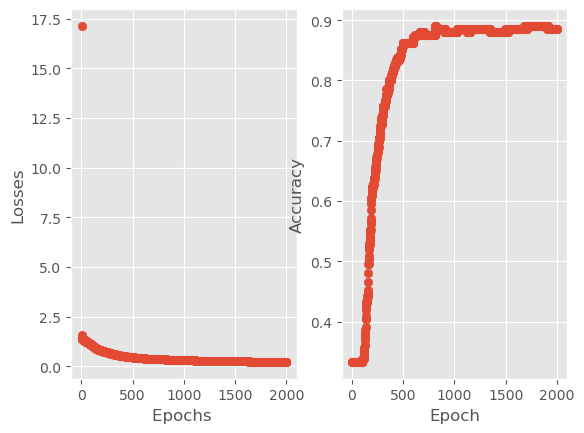

In [8]:
# simple model without any hidden layer
import warnings
warnings.filterwarnings("ignore")
losses3, acc3 = train(dataset=torch.tensor(data, dtype=torch.float32), num_epochs=num_epochs, lr=lr, 
                                batch_size=batch_size, params=params3, optimizer=optimizer3)            
style.use("ggplot")
plt.subplot(1,2,1)
plt.scatter(range(1, num_epochs+1), losses3)
plt.xlabel("Epochs ")
plt.ylabel("Losses")
#plt.legend()
plt.subplot(1,2,2)
plt.scatter(range(1, num_epochs+1), acc3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

* #### Simple network is performing better (neural network perform well on unstructured data due to low chahce of overfitting as compared to structured data)